# Module 2:

## Basic Charting

Matplotlib Architecture:

Backend Layer: 
      - Deals with the rendering of plots to screen or files
      - In Jupyter notebooks we use the inline backend

Artist Layer:
      - Contains containers such as Figure, Subplot, and Axes
      - Contains primitives, such as a Line2D and Rectangle, and collections, such as a PathCollection
      
Scripting Layer:
      - Simplifies access to the Artist and Backend layers

In [2]:
%matplotlib notebook
# Using %matplotlib notebook creates interactive plots that are embedded within the notebook itself, allowing those 
# viewing the notebook to do things like resize the figure or zoom in on the figure.

# which is better %matplotlib notebook or %matplotlib inline? (google)
# This answer is underrated. %matplotlib notebook provides the better visualization than %matplotlib inline. Using 
# %matplotlib notebook does not work (kind of shows something, then blank) on jupyter notebook 4.1.1/ubuntu 16.04/chrome
# %matplotlib inline does show images, but they come after the markdown text, not literally 'inline'.

Now in previous versions of matplotlib we would use a backend specific for Jupyter called 'nbAgg'. But things have changed, and now we use an inline backend engine. Now, you don't really need to know the details of this, but it's helpful to know that you can investigate if you want to. Let's import matplotlib and check which backend we will be using.

In [1]:
import matplotlib as mpl
mpl.get_backend()

'module://matplotlib_inline.backend_inline'

Ok, we're going to start our plotting journey by making a graph using the `plot` function. A plot has two axes, an x-axis along the horizon, and a y-axis which runs vertically.

First, let's import the pyplot scripting layer as `plt`. All of the functions which will run against the Pyplot module are part of the scripting layer of the architecture. Let's take a look at the plot function by looking at the docstring.

In [3]:
import matplotlib.pyplot as plt
plt.plot?

<IPython.core.display.Javascript object>


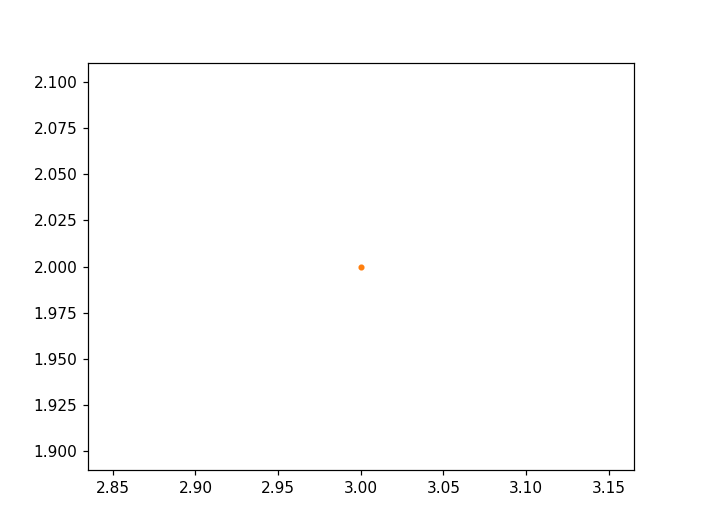

In [6]:
# So let's try with just one data point at position 3,2. The return value is 
# the plot itself, and JupyterLab will call display automatically on this to
# render it in the notebook.
plt.plot(3,2)
# We don't see the data points though, which is a bit odd. It turns out that the third argument to `plot` should be a 
# string which signifies how we want that data point to be rendered. Let's use a period for a dot, and we'll see that
# our data point shows up.

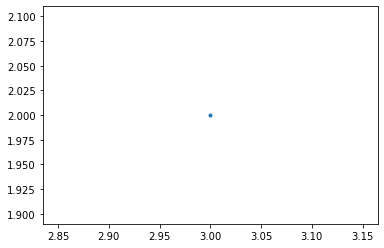

In [5]:
# The docs tell us what the different characters will render like, here we're just going
# to use a full stop for the marker
plt.plot(3,2,'.') 

In [10]:
# First, I'm going to import a new backend called FigureCanvasAgg.
from matplotlib.backends.backend_agg import FigureCanvasAgg

# Now we'll bring in the figure object
from matplotlib.figure import Figure

# I'll create a new empty figure
fig = Figure()

# And then associate this figure with the canvas backend
canvas = FigureCanvasAgg(fig)

# We can then add a subplot directly to this. We're going to talk more about subplots in a future 
# lecture, but this number 111 actually means that we just want one plot. The return value for the 
# subplot is the Axes object, which contains methods for plotting
ax = fig.add_subplot(111)

# Now we can plot on the Axes as per usual
ax.plot(3, 2, '.')

# We have a figure now, but our backend isn't able to render this directly inside of JupyterLab.
# So here I'll just save the figure to a png file instead.
canvas.print_png('test.png')
# Then, we'll do a quick HTML cell magic, and execute that and see the rendered image. That's a lot more work than 
# using the scripting layer, but you can see the effect is the same.

In [11]:
%%html
<img src='test.png' />

(0.0, 6.0, 0.0, 10.0)

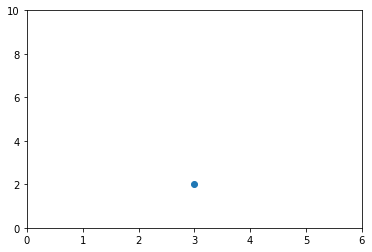

In [9]:
# Create an empty figure
plt.figure()

# Plot the point (3,2)--- this time using a circle marker
plt.plot(3,2,'o')

# Get a reference to the current axes using gca function
# - gca being (get current function) -- sumilar other function gcf being (get current figure)
ax = plt.gca()

# And set our axis properties. This function takes four parameters: a minimum value 
# for x which we'll put it zero, a maximum value for x which we'll put at six, and
# minimum and maximum y values.
ax.axis([0,6,0,10])

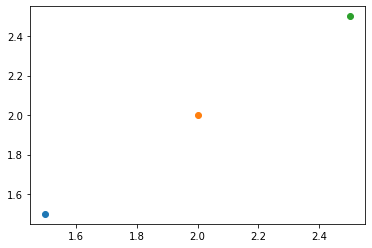

In [11]:
plt.figure()
plt.plot(1.5,1.5,'o')

plt.plot(2,2,'o')
plt.plot(2.5,2.5,'o')

A lot of complexity is hidden from you, but we can go further with the `Axes` object, to the point where we can actually get all of the child objects that that axes contains. We do this with the axes `get_children` function. Let's take a look at what children exist in the current axes.

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

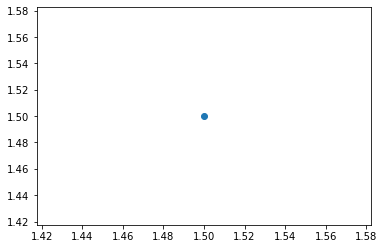

In [15]:
# Get current axes - this will create a new figure since we're in a new cell
ax=plt.gca()

#let's add a point
plt.plot(1.5,1.5,'o')

# And take a look at all the children of the Axes object
ax.get_children()

Here, we can see that there's actually a `Line2D` object contained in this axes, this is our data point! We also have a number of spines which are actual renderings of the borders of the frame including tic markers, two axis objects, and a bunch of text which are the labels for the chart. There's even a rectangle which is the background for the `Axes`.

## Scatterplots

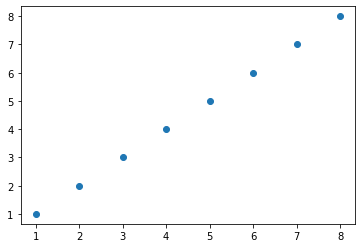

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Let's create some fake data
x= np.array([1,2,3,4,5,6,7,8])
y= x

# Let's create a new figure
plt.figure()
# Now let's get matplotlib to produce a scatterplot.This is similar to plt.plot(x, y, '.'), but
# the underlying child objects in the axes are not Line2D
plt.scatter(x= x, y= y, marker='o')

Now, `scatter` doesn't represent items as a series as `plot` did, instead, we can pass it a list of colors which correspond to given points. Let's use some list arithmetic to create a new list just short of the number of data points we need and set all of the values to green. Then we'll add a final value of red.

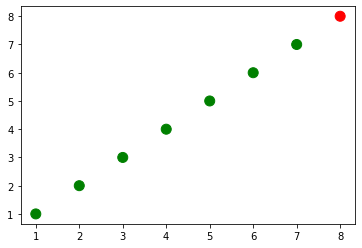

In [28]:
# Let's create some fake data
x= np.array([1,2,3,4,5,6,7,8])
y= x

# create a list of colors for each point to have ['green', 'green', 'green', 'green', 'green', 'green', 'green', 'red']
colors = ['green'] * (len(x)-1)
colors.append('red')

#Create our new figure
plt.figure()

plt.scatter(x, y, s=100, c=colors)


The separation of data points into lists, which describes them as components is a pretty common pattern in matplotlib. You have some set of items, but they're actually described as the same slice across many different data sources.

Those who are familiar with object programming might expect that each data point is represented with its own instance, which encapsulates all of its properties. For instance, a point has an x value and a y value and a color and a size. That's not the case here. This is where it's useful to have some knowledge of list comprehensions and lambdas as we talked about in the first course. Also important is the zip function and list unpacking. And because this is so common in the Python data science world, I'm going to take a brief aside and talk about that here.

Recall that the zip method takes a number of iterables and creates tuples out of them, matching elements based on index. So if we have two lists of numbers, zip will take the first from each and create a tuple, then the second from each and create a tuple, and so on.

Also remember that zip has lazy evaluation because it's actually a generator in Python 3 which means we need to use the `list` function if we want to see the results of iterating over zip.

Let's demonstrate. Here we'll create a new zip generator with a zip function passing in two lists of numbers. When we convert this generator to a list, we see there's a list of pairwise tuples.

In [30]:
# convert the two lists into a list of pairwise tuples
zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])
print(list(zip_generator))  # --this creates a list of tuples
# the above prints:
# [(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]

# let's do that again, but this time let's use unpacking instead of list
zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])
# The single star * unpacks a collection into positional arguments
print(*zip_generator)   # --this creates tuples at specific position not a single list but individual arguments
# the above prints:
# (1, 6) (2, 7) (3, 8) (4, 9) (5, 10)

[(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]
(1, 6) (2, 7) (3, 8) (4, 9) (5, 10)


Storing point data as tuples is common and you should be familiar with being able to convert data to and from this form. If we want to turn the data back into two lists, one with the x component and one with the y component, we can use parameter unpacking with zip.

When you pass a list or an iterable  to a function and prepend it with an asterisk, each item is taken out of the iterable and passed as a separate argument.

So that's a brief aside on a valuable tool which you will see when manipulating and cleaning data in the wild. Now, let's get back to plotting. Let's take these two lists and plot them to a new figure using scatter. Instead of plotting them as one data series, we'll slice the lists and plot them as two data series.

Instead of setting a color per datapoint, we can color each series with a single value if we want to. We can also do things like change the color or transparency of an entire series. We can also add a descriptive label as well.

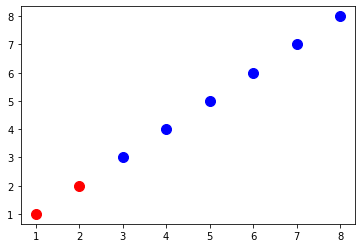

In [34]:
#Create a blank figure
plt.figure()
# plot a data series 'Tall students' in red using the first two elements of x and y
plt.scatter(x[:2], y[:2], s=100, c= 'red', label = 'Tall Students')
# plot a second data series 'Short students' in blue using the last three elements of x and y 
plt.scatter(x[2:], y[2:], s=100, c='blue', label = 'Short Students')

You'll notice that the label didn't show, at the moment it's just held internally for each series, and I'll get to that in a minute, but let's talk a bit more about the properties of axis.

The axes generally have labels to them to explain what they represent or the units that they describe. Charts tend to have titles as well, so let's put this in place and, since pyplot mirros much of the API of the axes objects, we can make calls directly with pyplot.

Text(0.5, 1.0, 'Relationship between ball kicking and grades')

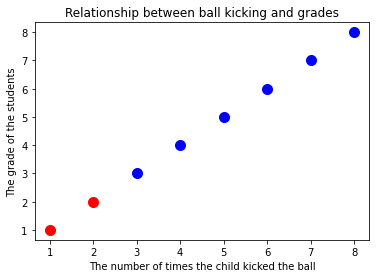

In [35]:
#Create a blank figure
plt.figure()
# plot a data series 'Tall students' in red using the first two elements of x and y
plt.scatter(x[:2], y[:2], s=100, c= 'red', label = 'Tall Students')
# plot a second data series 'Short students' in blue using the last three elements of x and y 
plt.scatter(x[2:], y[2:], s=100, c='blue', label = 'Short Students')

# Add a label to the x axis
plt.xlabel('The number of times the child kicked the ball')
# add a label to the y axis
plt.ylabel('The grade of the students')
# add a title
plt.title('Relationship between ball kicking and grades')

And let's add a legend as well. You'll see that matplotlib places this in the upper left hand corner and puts a little visual about our data series there.

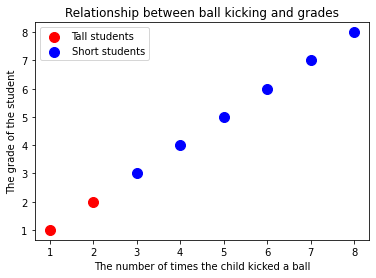

In [36]:
plt.figure()
# plot a data series 'Tall students' in red using the first two elements of x and y
plt.scatter(x[:2], y[:2], s=100, c='red', label='Tall students')
# plot a second data series 'Short students' in blue using the last three elements of x and y 
plt.scatter(x[2:], y[2:], s=100, c='blue', label='Short students');

# add a label to the x axis
plt.xlabel('The number of times the child kicked a ball')
# add a label to the y axis
plt.ylabel('The grade of the student')
# add a title
plt.title('Relationship between ball kicking and grades');
# add a legend (uses the labels from plt.scatter)
plt.legend();

In the docs for the legend, you'll see that there are a number of different parameters and one of them is called loc. And a value of 4, we'll put it in the lower right hand corner of the axis.

We could also get rid of the frame and add a title, and do any number of different transformations.

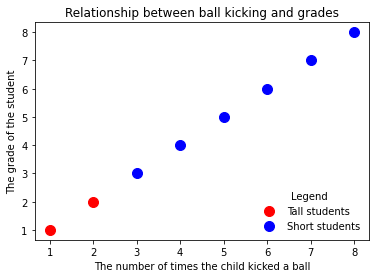

In [37]:
f=plt.figure()
# plot a data series 'Tall students' in red using the first two elements of x and y
plt.scatter(x[:2], y[:2], s=100, c='red', label='Tall students')
# plot a second data series 'Short students' in blue using the last three elements of x and y 
plt.scatter(x[2:], y[2:], s=100, c='blue', label='Short students');

# add a label to the x axis
plt.xlabel('The number of times the child kicked a ball')
# add a label to the y axis
plt.ylabel('The grade of the student')
# add a title
plt.title('Relationship between ball kicking and grades');
# add the legend to loc=4 (the lower right hand corner), also gets rid of the frame and adds a title
plt.legend(loc=4, frameon=False, title='Legend');

Now, all of the things I've been showing you are renderable objects associated with the axes. The legend, for instance, is an artist, which means it can contain children. Let's take advantage of this and write a little routine to recursively go through the list of children in an artist.

In [38]:
# First, we'll import the artist class from matplotlib.
from matplotlib.artist import Artist

# Then we'll make a recursive function which takes in an artist and some depth parameter.
def rec_gc(art, depth=0):
    # Then checks if the object is an artist and if so, prints out its string name.
    if isinstance(art, Artist):
        # increase the depth for pretty printing
        print("  " * depth + str(art))
        for child in art.get_children():
            rec_gc(child, depth+2)

# Call this function on the legend artist to see what the legend is made up of
rec_gc(f.legend())

Legend
            Text(0, 0, '')
                        Text(0, 0, 'Tall students')
                        Text(0, 0, 'Short students')
    FancyBboxPatch((0, 0), width=1, height=1)


So you can see the legend artist is just made up of a number of different offsetboxes for drawing, as well as TextAreas and PathCollections.

What I want you to take away from this is that there is nothing magical about what matplotlib is doing. Calls to the scripting interface, just create figures, subplots, and axis. Then load those axis up with various artists, which the back-end renders to the screen or some other medium like a file.

While you'll spend 95% of your time at the scripting layer, happily creating graphs and charts, it's important to understand how the library works underneath for the other 5% of the time.

And the time that you will use this is when you really want to have control over and to create your own charting functions, and you'll have a chance to do that by the end of this course.

## Line Plots

A line plot is created with the `plot` function and renders a number of different series of data points and connects each point in a series with a line. Let's jump right in. 
So there are a couple of things which are new about this versus the scatter plots. 

- First, we only gave y-axes values to our plot call, no x axes values. Instead, the plot function was smart enough to figure out that what we wanted was to use the index of the series as the x value. Which is pretty handy when you want to make quick plots.
- Second we see that the plot identifies this as two series of data and that the colors of the data from the series are different including the data points and the lines between the data points. This is different from the scatter plot which required us to label the lines directly.

In [39]:
import matplotlib.pyplot as plt
import numpy as np

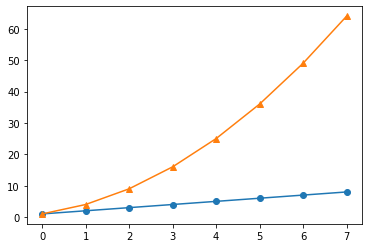

In [52]:
# We can use numpy to use a linear series of data points one through eight. We'll  also create a number of quadratically 
# increasing values as the second series. Remember that you can use broadcasting in numpy to do this efficiently.
linear_data = np.array([1,2,3,4,5,6,7,8])
exponential_data = linear_data**2

# This time I'll use the mini formatting language to describe how I want the markers and lines to be rendered.
# The -o means to use a solid line with circle markers. Note that I'm passing the data followed by the formatting
# for each series, so we'll see the result as a two data series, the linear one at the bottom and the quadratic 
# one at the top.
plt.figure()
#plt.plot(linear_data, marker= 'o')
#plt.plot(exponential_data, marker= '^')
plt.plot(linear_data,'-o', exponetial_data, '-^')

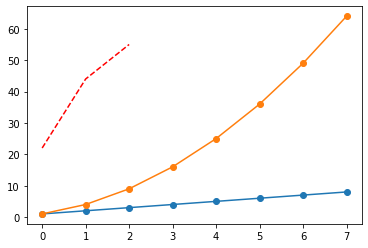

In [53]:
# It's pretty easy to extend this and add some arbitrary new line, this time I'll
# use --r which says to plot a dashed line in red.
plt.plot(linear_data, '-o', exponential_data, '-o')
plt.plot([22,44,55], '--r');

Wait, did you notice what I did there? I didn't call `plt.figure()`! By default pyplot's scripting interface will call plt.gcf() when you try and do something. If no figure is defined, it will create a new one for you. The way JupyterLab is configured by default it will automatically close a figure after each cell is executed, so this means pyplot is going to create a new figure for us for each and every cell. This is a great time saver -- good by `plt.figure()`! 

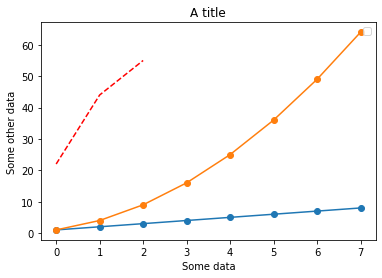

In [54]:
# Create some meaningful labels
plt.xlabel('Some data')
plt.ylabel('Some other data')
plt.title('A title')
# Add a legend with legend entries (because we didn't have labels when we plotted the data series)
plt.legend(['Baseline', 'Competition', 'Us'])
plt.plot(linear_data, '-o', exponential_data, '-o')
plt.plot([22,44,55], '--r');

This is a good time to introduce the *fill between* function of matplotlib. Now this function isn't specific to line plots, but you can see it commonly used with these plots, so I'll introduce it in this context. Let's imagine that we want to highlight the difference between the green and the blue curves. We could tell the Axes to paint a color between these series using the fill between function.

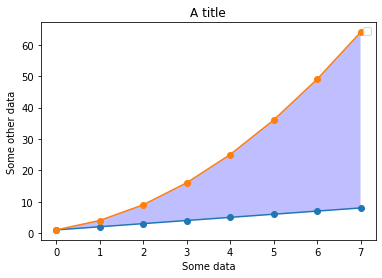

In [55]:
# Let's add our labels and legend just as before
plt.xlabel('Some data')
plt.ylabel('Some other data')
plt.title('A title')
plt.legend(['Baseline', 'Competition', 'Us'])
plt.plot(linear_data, '-o', exponential_data, '-o')

# Now we need to get the current axes object, and call fill_between. We didn't specify any x 
# values in our call to plot, so we'll just use the same range of data points it's already using. 
# Then we'll put in our lower bounds and our upper bounds along with the color we want painted 
# and for fun I'll include a transparency value. And that's all there is to it.
plt.gca().fill_between(range(len(linear_data)), 
                       linear_data, exponential_data, 
                       facecolor='blue', 
                       alpha=0.25)

More likely you'll have a series of x values and y values which you're looking to plot. Often with line plots this comes in the form of date time on the x axes. Let's change our x axis to a series of eight date time instances in one day intervals.

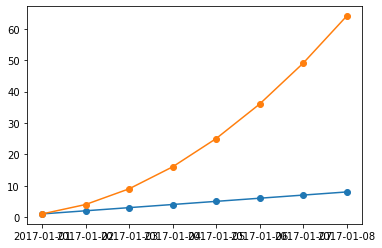

In [56]:
# I'll use the NumPy arrange function which you saw previously is really helpful to generate
# some sample dates for us. We can ask for an arrangement of dates at daily intervals just 
# by providing the start and end dates.
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')

# We can now replot our linear and exponential data against this set of dates.
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o');

This produces a pretty decent looking figure with the data we want. But the dates overlap pretty heavily. Now, there's a couple of things that we could do here. For instance, everything is from 2017. So we could iterate through and change the labels by stripping the year, and then add an x axis label which clarifies that it's all for the year of 2017. This is pretty reasonable, but I wanted to show you a couple of features of how matplotlib uses text instead.

There are lots of interesting properties of the axes object and you should use some them in the assignment. For instance; you can get the grid lines, the tick locations for both major and minor ticks and so on. Just like all artists, an axes has a bunch of children which are themselves artists. In fact, if you're are following along in the JupyterLab notebook with this lecture why don't you just pause the video and run the `rec_gc` function we wrote earlier to explore what kind of artists the x axes object actually contains.

What I want to show you though, is that you can access the text of the tics using the get tick labels function. Each of the tick labels are a text object which itself is an artist. This means that you can use a number of different artist functions and one specific to text is the set rotation function which changes the rotation based on degrees. Let's iterate through the axis labels and change that.

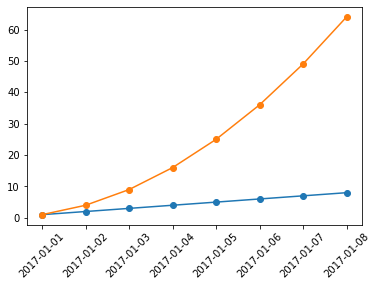

In [57]:
# Our plot data
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o');

# Now lets get a variable which points at the x axis
x = plt.gca().xaxis

# Now we can iterate through each one and rotate the tick labels
for item in x.get_ticklabels():
    item.set_rotation(45)

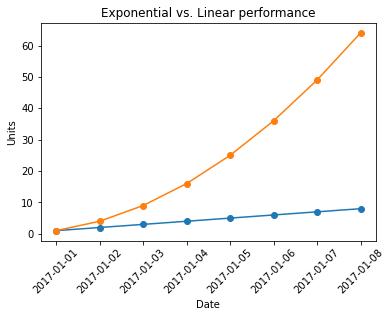

In [58]:
# Merging code from previous
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o');

x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)
    
# Change our labels
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Units')
ax.set_title('Exponential vs. Linear performance');

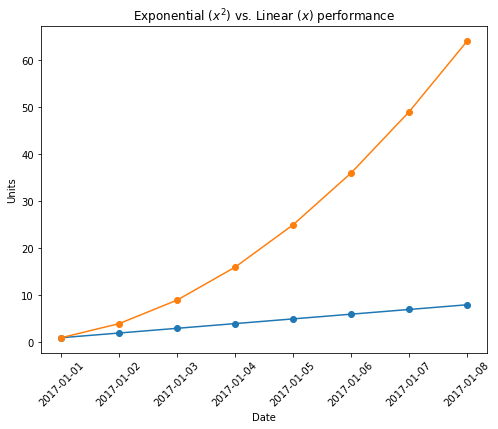

In [59]:
# By creating a new figure with the figsize parameter I'm telling matplotlib
# that I want an 8x6 inch figure at 300 DPI
plt.figure(figsize=(8,6))

# Now we can bring in our plotting details from before
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o');
x = plt.gca().xaxis
# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Units')

# And finally, I'll add in some mathematical expressions which you can do 
# in any text element
ax.set_title("Exponential ($x^2$) vs. Linear ($x$) performance");

## Bar Charts

Matplotlib has support for several kinds of bar charts. In the most general case we plot a bar chart by sending in a parameter of the x components, and a parameter of the height of the bar. Let's do this with some linear data. 

<BarContainer object of 8 artists>

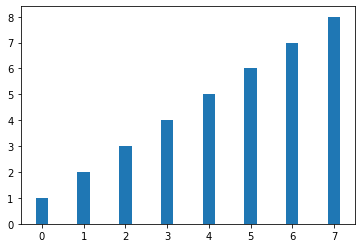

In [61]:
# Bring the libraries and create a linear data
import matplotlib.pyplot as plt
import numpy as np

linear_data = np.array([1,2,3,4,5,6,7,8])

# Then generate a list of xlabels
xvals = range(len(linear_data))

plt.bar(xvals, linear_data, width= 0.3)

To add a second bar, we simply call the bar plot again with new data, keeping in mind that we need to adjust the x component to make up for the first bar we plotted.

<BarContainer object of 8 artists>

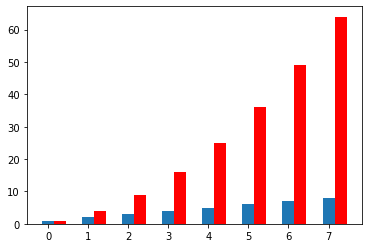

In [67]:
new_xvals = []

exponential_data = linear_data**2

for item in xvals:
    new_xvals.append(item+0.3)

plt.bar(xvals, linear_data, width= 0.3)    
plt.bar(new_xvals, exponential_data, width=0.3, color = 'red')

So the plot looks okay, but not great. All of the x labels are to the far left of the items being described, and not centered. Now, we can center them with a given bar, using the align parameter, but it's a bit frustrating when you have to make multiple bars, and you have to calculate it yourself. And it's a pain to go through and add a new data series manually. And this gets worse, we actually have to manually iterate through and add in dates if we want them. Because otherwise we couldn't set the bar left location appropriately.


I'll be honest, bar charts are one of my least favorite things to create in matplotlib. I feel like the foundation is there, but some of the ways I would want to use the API, such as plotting several series of data in groups across time, are sadly missing.

There are some other nice features of bar charts, though. For instance, you can add error bars to each bar as well, using the y-error parameter. For example, each of our pieces of data in the linear data might actually be a mean value, computed from many different observations. So we could just create a list of error values we want to render as well and show them.

<BarContainer object of 8 artists>

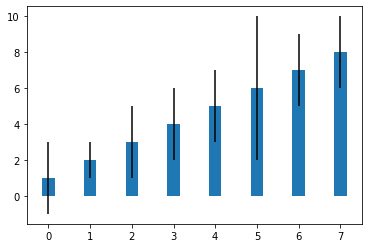

In [68]:
# I'll import from a random function which can generate some random integers, and then I'll use a 
# list comprehension to generate this new list.
from random import randint
linear_err = [randint(1,4) for x in range(len(linear_data))] 

# This will plot a new set of bars with errorbars using the list of random error values
plt.bar(xvals, linear_data, width = 0.3, yerr=linear_err)

We can also do stacked bar charts as well. For instance, if we wanted to show cumulative values while also keeping the series independent, we could do this by setting the bottom parameter and our second plot to be equal to first set of data to plot.

<BarContainer object of 8 artists>

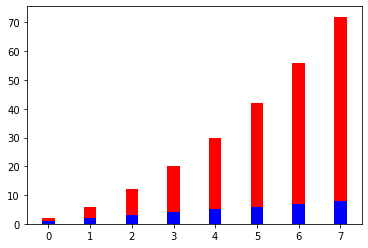

In [69]:
# All we need to do here is to set the bottom parameter of the second barchart
# to be the linear data heights
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3, color='b')
plt.bar(xvals, exponential_data, width = 0.3, bottom=linear_data, color='r')

Finally, we can pivot this bar graph into a horizontal bar graph by calling the barh function instead.

But note that we have to change the bottom to a left and the width to a height.

<BarContainer object of 8 artists>

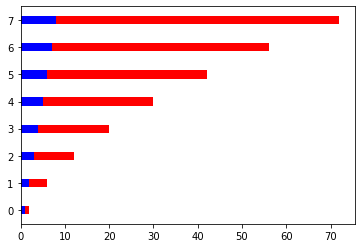

In [70]:
# To switch to horizontal bar charts we just use barh as the function, and then change the width parameter to a height
xvals = range(len(linear_data))
plt.barh(xvals, linear_data, height = 0.3, color='b')
plt.barh(xvals, exponential_data, height = 0.3, left=linear_data, color='r')

So those are the basics of charting and plotting in Matplotlib. I think it's important to realize that there really isn't any magic -- the scripting layer is really a set of convenience functions on top of the object layer.

Some people have a preference for one or the other, but at the core, they manipulate the same data elements. And I don't think you should think of them as being opposed to one another or duplicative. They work together, and being able to move back and forth is really important.

We've talked about some fundamental charts in this module. Scatter plots, line graphs, and bar charts. There are more, which we'll dig into in the next module. But these are a good base for consideration.

The assignment for this module is a tough one. It's meant to show you real world data visualization problems. You're going to have to lever your knowledge of the Pandas Library from the first course and couple this with your new knowledge of Matplotlib to come to an elegant solution.

But the final result should be a portfolio ready piece. So I'll see you in the forums for discussions and for help.

## Dejunkifying a Plot

In this lecture, I want to walk you through the process of taking a regular Matplotlib plot and applying Tufte's principles of data-ink ratio and chartjunk to make it just a little bit better. I'm going to walk through all of the steps using the Jupyter notebooks and you're welcome to follow along.

But if you want a bit more of a challenge, I'll be including in video quizzes along the way which prompts you to solve the problem before I address.

Let's get started -- We will use a plot of data on the popularity of programming languages from Stack Overflow for the year 2016.

See the data here: [http://stackoverflow.com/research/developer-survey-2016#most-popular-technologies-per-occupation](http://stackoverflow.com/research/developer-survey-2016#most-popular-technologies-per-occupation)

Text(0.5, 1.0, 'Top 5 Languages for Math and Data \nby % Popularity on Stack Overflow')

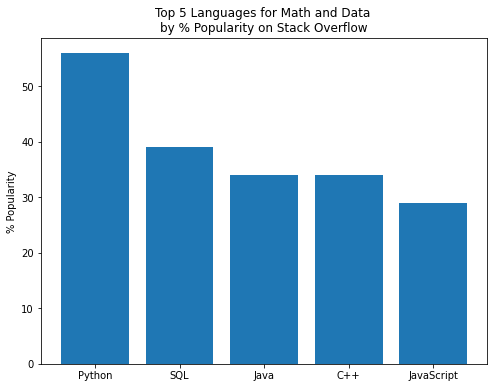

In [87]:
import matplotlib.pyplot as plt
import numpy as np
# Here there are five different languages, Python, SQL, Java, C++, and JavaScript.We'll find their positions as a rank  
# using NumPy as a range function. And here are the popularity values from Stack Overflow.
languages= ['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]
plt.figure(figsize=(8,6))
plt.bar(languages, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math and Data \nby % Popularity on Stack Overflow')

Okay, here's the first challenge -- our plot has this frame around it, but it's not really necessary and it seems a little heavyweight.

Let's remove that ink. This is a bit more involved, but we can get the current axis, then iterate through all the spine, setting their visibility to false.

Already that will make the chart look much more lightweight.

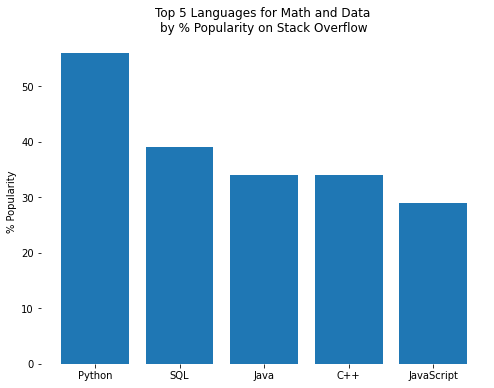

In [93]:
import matplotlib.pyplot as plt
import numpy as np
# Here there are five different languages, Python, SQL, Java, C++, and JavaScript.We'll find their positions as a rank  
# using NumPy as a range function. And here are the popularity values from Stack Overflow.
languages= ['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]
plt.figure(figsize=(8,6))
plt.bar(languages, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math and Data \nby % Popularity on Stack Overflow')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

Now, the blue is okay, but it doesn't really help us differentiate between the bars at all. How about we soften all of the hard blacks to gray, then we change the bar colors to gray as well?

Also, let's keep the Python bar the same color of blue that it was originally to make it stand out.

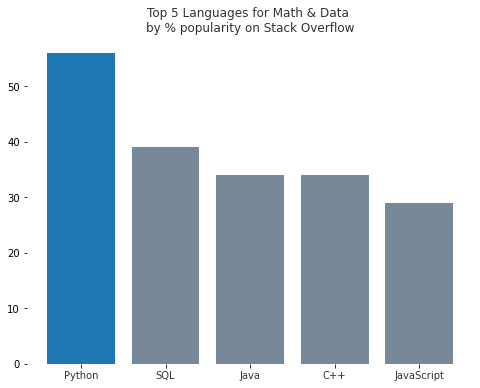

In [95]:
plt.figure(figsize=(8, 6));
languages = ['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# There are several different ways that we could do this.The way I chose was to add an alpha parameter to everything,
# which adds a bit of transparency and softens the colors up a bit. I also set the bars themselves to a neutral gray 
# color then chose a nice blue from the Python website to accentuate the first bar. change the bar color to be less
# bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
# change one bar, the python bar, to a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(pos, languages, alpha=0.8)
# set the title
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

Now let's fix the y axis by removing the labels and just directly labeling the individual bars.

We don't really need the y axis label, since the title tells us everything we need to know about the units in this chart.

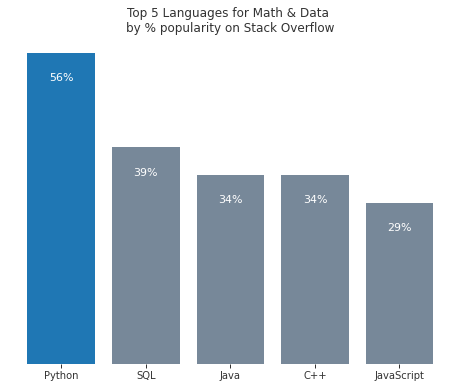

In [97]:
plt.figure(figsize=(8, 6));
languages = ['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
bars[0].set_color('#1F77B4')

plt.xticks(pos, languages, alpha=0.8)

# We can remove the y label by just setting it to an empty list
plt.yticks([])

plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Removing the label is easy, but changing the bars is a little bit of a pain. For this we want to iterate over each
# of the bars and grab its height. Then we want to create a new text object with the data information.
for bar in bars:
    # Unfortunately, this means doing a little bit of playing with padding. Here I'll set up the x location to the bar
    # x plus the width divided by two and the y location to be the bar height minus five.
    # It might seem weird to get the middle of the bar in the x dimension, but that's because I'm setting the label
    # to center itself, horizontally.
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, str(int(height)) + '%',
                   ha='center', color='w', fontsize=11)
    

# Module 3:

Charting Fundamentals

## Subplots

In [98]:
import matplotlib.pyplot as plt
import numpy as np

plt.subplot?

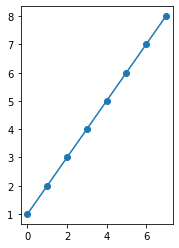

In [99]:
# let's create a new figure
plt.figure()

# and make a subplot with 1 row, 2 columns, and current axis is 1st subplot axes
plt.subplot(1, 2, 1)

# now let's plot some fake linear data
linear_data = np.array([1,2,3,4,5,6,7,8])
plt.plot(linear_data, '-o')

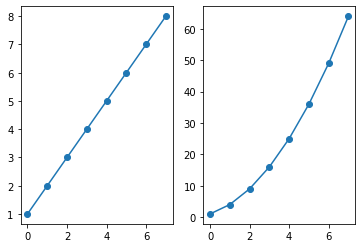

In [100]:
# Our previous data
plt.subplot(1, 2, 1)
linear_data = np.array([1,2,3,4,5,6,7,8])
plt.plot(linear_data, '-o')

# now our new data in the second subplot
plt.subplot(1, 2, 2)
exponential_data = linear_data**2 
plt.plot(exponential_data, '-o')

And that's nice. Now we have two plots, each with their own axis objects. Now the norm with matplotlib is that you store the axis object that you get back from the subplot. But you can call subplot again. At any time with the parameters that interest you in order to get back a given axis.

Take a look at this figure though, do you notice anything odd about this image thinking of our first week of the course? The two images have different y axes values. This would be a problem and potential mislead the reader if we didn't find a way to lock axis between two plots. When you create a new subplot you are able to share the x, y, or both axis using the share x and share y parameters.

Let's clean this up.

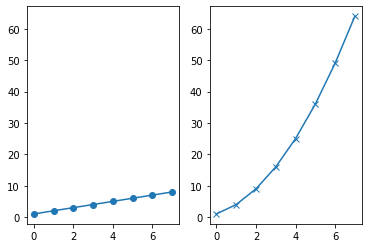

In [101]:
# Let's plot the first figure and get a reference to that axes
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
# now let's tell the next plot we want to share the y axes with the
# one from ax1 to ensure the two subplots share the same y axis
ax2 = plt.subplot(122, sharey=ax1)
plt.plot(exponential_data, '-x')

There we go. Two plots side by side and we've locked the y axis.

Now, those of you who have been playing close attention will note that I used the `subplot` function a second time but I didn't pass in three parameters, just one. The maplotlib developers allow you to specify the row, columns, and number of the plot that you want with either three parameters or a single parameter. Where the hundreds values the first argument, the tens the second argument, and the ones the third argument.

Now, I'm frankly not a big fan of this second syntax -- it feels pretty hacky and it really only saves typing two commas and yet limits us to single digit. Computer science folks might feel a little twitch inside like something's wrong with this notation, and I'll say that it certainly bugged me the first few times I saw it. But I wanted you to be aware of it so you would be able to read it when you come across it in the docs.

An important fact to remember is that the plot location in the matrix of items is index starting at one and not at zero, as would be the convention if you were using something like NumPy. So if you're iterating through a matrix or list, create subplots, remember to start at position plus one.

Now, there's a nice function called subplots, note the plural, which allows you to get many axis objects at once, and I think this is great. So, if we wanted to get a three by three grid with all of the axis x and y ranges locked, we can do so like this.

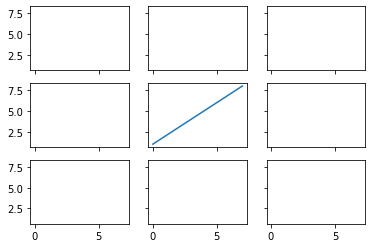

In [102]:
# create a 3x3 grid of subplots, using tuple unpacking
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)
# plot the linear_data on the 5th subplot axes 
ax5.plot(linear_data, '-')

The syntax looks a little goofy maybe since we're unpacking the results of the subplots function directly, but it's an effective way to build a grid where everything shares an axis. The results however look really nice, but note that this method turns off the y and x labels except for those plots which are on the left hand side or the bottom of the figure.

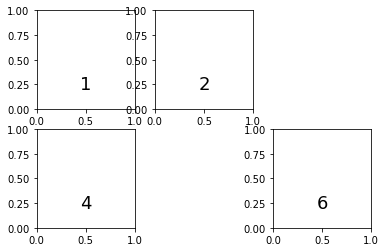

In [103]:
# So, let's create a basic figure
fig = plt.gcf()
# Now let's iterate over 6 potential spots in our figure. I'm going to create a plot with 2 rows and 3 columns
for i in range(1, 7):
    # let's not plot something if we are at position 5 or 3, we'll leave these as holes just to see what happens
    if i != 5 and i != 3:
        # Now let's add a subplot, we specify the first two arguments as the structure we are expecting the 
        # figure to take, so 2 rows and 3 columns, and the third argument is the position of this item in the 
        # figure, in this case i. 
        # While we are iterating linearly this is mapped onto our 2x3 row/column space, so the
        # numbering goes from left to right and top to bottom
        ax = fig.add_subplot(2, 3, i)
        # And we'll just add some text to the figures to make it more clear which item went where.
        # Remember from the lecture on annotation that text goes at the bottom left corner by default, 
        # and we are using relative positioning
        ax.text(0.5, 0.2, str((i)),fontsize=18, ha='center')

## SPLOMS

So, we now understand why there are abstractions of Axes in a figure, because a figure might have several
Axes objects which show multiple views of data. A common data science visual exploration technique is called
the SPLOM, which stands for scatterplot matrices. These are particularly useful for getting the relationship
between a number of different variables from a quick glance. Now, a SPLOM is actually similar to what
Edward Tufte called a "small multiple" -- a set of visuals that look at related data but that slice that
data into different small visuals so you can see both the trees and the forest at once.

Let's take a look, I'm going to use some data from the iris dataset

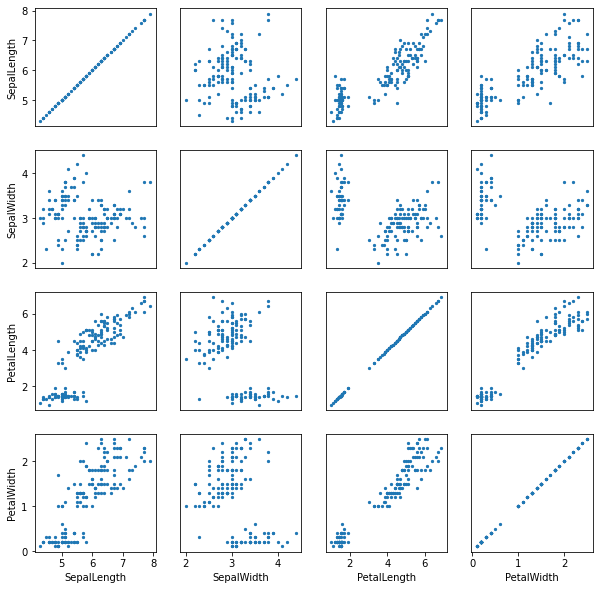

In [104]:
# Let's first capture a list of the variables we are interested in
import pandas as pd
df=pd.read_csv("C:\\Users\\Manya\\Documents\\Resources and Datasets\\Coursera_datasets\\Course 2\\iris.csv") 
cols = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

# Now we need to create a grid of subplots of size width and height equal to the number of different variables
# we want to explore, in this case that's a 4x4 grid
fig, axs = plt.subplots(len(cols), len(cols), figsize=(10,10))

# Now we want to iterate across each column in our dataframe and compare it to each other column in our
# DataFrame. We'll do this with a couple of nested for loops
for i in range(len(cols)):
    for j in range(len(cols)):
        # Now we just want to plot a scatter plot comparing the columns i and j. Sometimes this will be the
        # same column, so we would expect to see a diagnol line trend. I'm going to set the marker size to 5
        # just to make things a bit more clear
        axs[i,j].scatter(df[cols[j]], df[cols[i]], s=5)

        # Also, we've seen that when we plot multiple Axes things get cluttered with Axis tickmarks and
        # labels, so let's turn those off
        axs[i,j].get_xaxis().set_visible(False)
        axs[i,j].get_yaxis().set_visible(False)

        # Then we'll turn them back on only if we are the last row...
        if i == len(cols) - 1:
            axs[i,j].get_xaxis().set_visible(True)
            axs[i,j].set_xlabel(cols[j])
            
        # ...and similarly, only show the y-axis labels for the first column.
        if j == 0:
            axs[i,j].get_yaxis().set_visible(True)
            axs[i,j].set_ylabel(cols[i])

# Now let's take a look at our data

## Histograms

A histogram is a bar chart which shows the frequency of a given phenomena.

A great example are probability distributions. For instance, in the first course in this specialization, we touched on the difference between the random, uniform, normal, and chi squared distributions.

Probability functions can be visualized as a curve, where the y-axis holds the probability a given value would occur, and the x-axis is the value itself. This is called a probability density function. The y-axis values are limited to between zero and one, where zero means there's no chance of a given value occurring and one means that the value will always occur.

The x-axis values are labeled in terms of the distribution function. In the case of the normal distribution, this is usually in terms of standard deviations.

So a histogram is just a bar chart where the x-axis is a given observation and the y-axis is the frequency with which that observation occurs. So we should be able to plot a given probability distribution by sampling from it.

Now, recall that sampling means that we just pick a number out of the distribution, like rolling a die or pulling a single card out of a deck. As we do this over and over again, we get a more accurate description of the distribution. Let's quit talking about this and do a bit of coding to see it in action.

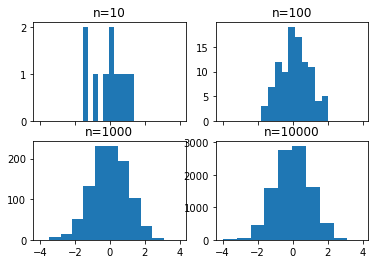

In [105]:
import matplotlib.pyplot as plt
import numpy as np

# Let's pull some samples from the normal distribution and plot four different histograms as subplots. First I'll 
# create our 2 x 2 grid of axis objects. In this case, we don't want to share the y-axis between the plots since 
# we're intentionally looking at a number of different sizes of samples.
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

# We're mostly interested in how uniform the distribution looks. Then we can iterate through a list of four 
# different values, 10, 100, 1,000 and 10,000. And we'll pull samples from the NumPy. Remember that the normal 
# function of random just creates a list of numbers based on the underlying normal distribution.

# So iterate through each axis
for n in range(0,len(axs)):
    # pull out a number of samples, getting exponentially bigger
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    # and plot that sample
    axs[n].hist(sample)
    # setting a useful, of course!
    axs[n].set_title(f'n={sample_size}')

Well, there we go. The first plot only has ten samples, so it looks pretty jagged. And in my version here I don't think anyone would say this is obviously a normal distribution. When we jump to 100 samples, it gets better, but still quite jagged. Then it seems to smooth out a bit on the plots for 1,000 and 10,000 samples.

But if we look closely, we can see that the bar of the 10,000 plots are actually wider than those of the 10 or the 100 plot. What's going on here?

By default, the histogram in Matplotlib uses ten bins, that is ten different bars. Here we created a shared x-axis, and as we sample more from the distribution, we're more likely to get outlier values further from our mean. Thus, ten bins for n=10 is at best capturing ten unique values, while for n=10,000, many values have to be combined into a single bin. Let's do the same function with the bin set to 100

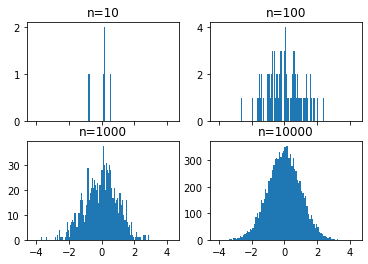

In [106]:
# repeat with number of bins set to 100
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

for n in range(0,len(axs)):
    # pull out a number of samples, getting exponentially bigger
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    # and plot that sample
    axs[n].hist(sample, bins=100)
    # setting a useful, of course!
    axs[n].set_title(f'n={sample_size}')

Now we see that the 10,000 sampled plot looks much smoother than all of the others. And the 10 sample plot shows that each sample is basically in its own bin.

So I think this brings up an important question of how many bins you should plot when using a histogram. I'm afraid that the answer isn't really clear. Both of these plots are true, one is a visual of the data at a coarse granularity, and one at a more fine grain granularity. When we look at the finest granularity in our data, plotting with 10,000 bins then the histograms became basically useless for decision making. Since they aren't showing trends between samples as much as they're just showing the sample size themselves. This is similar to using aggregate statistics like the mean in standard deviation to describe a sample of a population. These values are coarse and whether they are appropriate depends highly on your questions and interests.

I want to use our newfound knowledge of histograms and subplots to introduce you to a more flexible GridSpec layout for subplots. The GridSpec allows you to map axes over multiple cells in a grid.

For instance, let's create a scatter plot where the y values come from the normal distribution, and the x values come from a random distribution.

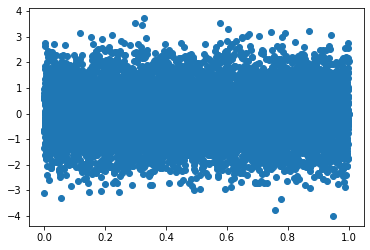

In [107]:
# Just a bunch of random data being created here
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
plt.scatter(X,Y);

It's not totally clear from looking at this plot what the actual distributions are for each axis, but we could add two smaller plots, each histograms, to make this a bit more clear. Let's dive right in -- I'm going to define a 3x3 grid, nine cells in total. I want the first histogram to take up the top right space, and the second histogram to take up the far left bottom two spaces, rotated on its side. The original scatter plot can take up a two by two square in the bottom right.

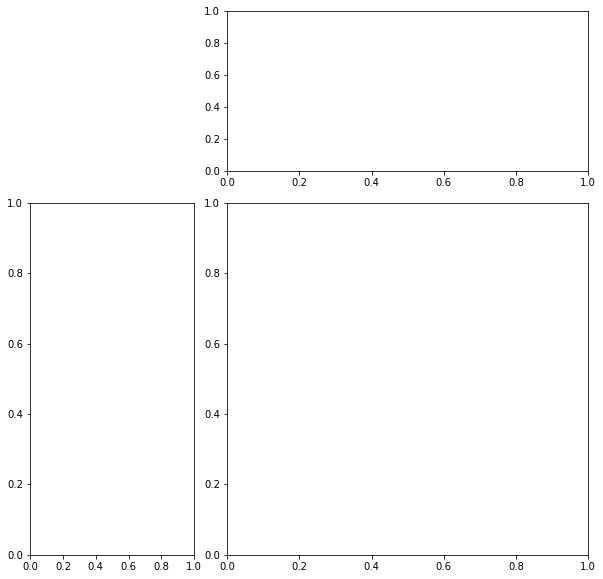

In [108]:
# To use the GridSpec, we first import it, then create a new GridSpec of the overall shape that we want.
# use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec
plt.figure(figsize=(10,10))
gspec = gridspec.GridSpec(3, 3)

# When we add new items with the subplot, instead of specifying the three numbers of row, column and position, 
# we pass in the elements of the GridSpec object which we wish to cover. And very important here. Because 
# we are using the elements of a list, all of the indexing starts at zero, and is very reasonable to use 
# slicing for the beginning or ends of lists.

# The GridSpec is indexed as rows and columns using the indexing operator, or square brackets. So we'll 
# create the first subplot and histogram in row 0, covering off the first element, the middle position, 
# and going to the end of the row.
top_histogram = plt.subplot(gspec[0, 1:])

# We'll create the side_histogram starting in row 1, and continuing to the end of row elements, but limited to 
# the 0 column.
side_histogram = plt.subplot(gspec[1:, 0])

# Finally we'll create the scatter plot in the lower_right. When we execute this, we see our basic set of 
# plots, great.
lower_right = plt.subplot(gspec[1:, 1:])

Now, let's fill this with some data. First the scatter plot, then the top histogram, which is for the x values, then the side histogram for the y values.

And we want the side histogram to be lined up, so let's rotate the layout by setting the orientation. There are actually a few ways of doing this, but since it's so common, Matplotlib has an orientation parameter which we can set to horizontal.

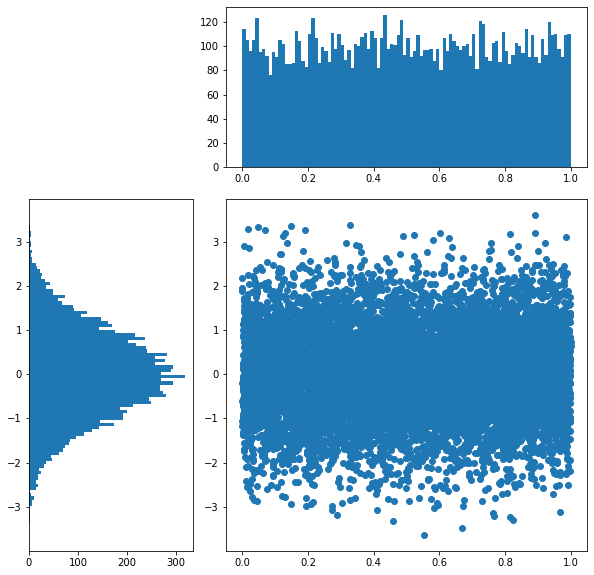

In [109]:
# Our fake data
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)

# Our figure and gridspec
plt.figure(figsize=(10,10))
gspec = gridspec.GridSpec(3, 3)

# Our three subplots all spec'ed out
top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

# And now our data plotted in each subplot
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
side_histogram.hist(Y, bins=100, orientation='horizontal');

It becomes immediately clear that we have two different distributions! Now we don't really care about the value of the y-axes for the top histogram or the value of the x-axes for the bottom histogram. Since these are probability density histograms, we care only about the relative values, and in matplotlib we can do this by indicating that our histograms are `density=True`. We can also invert the xaxis subplot for the histogram on the left hand side, which makes is (perhaps) more clear that it represents the data in the right hand side. We do this directly using the `invert_xaxis` function on the axis. Finally, we can see that our axes have a bit of whitespace padding on the left and right which seems unneccessary. So we can get rid of this by changing our axes limits.

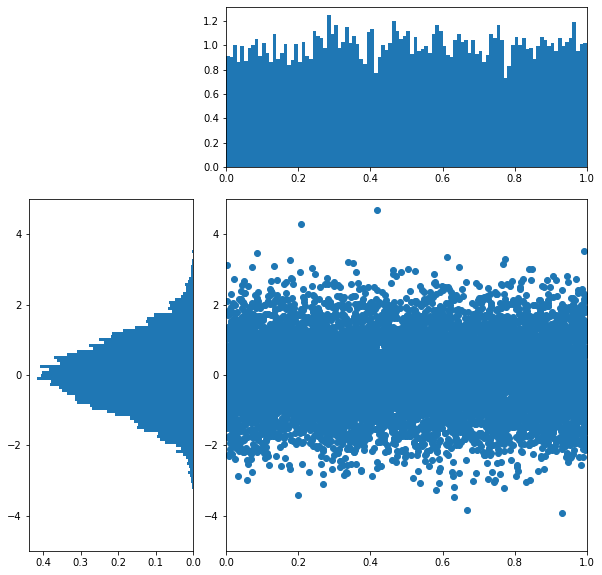

In [110]:
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)

# Our figure and gridspec
plt.figure(figsize=(10,10))
gspec = gridspec.GridSpec(3, 3)

# Our three subplots all spec'ed out
top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

# And now our data plotted in each subplot, making it clear this is a density function
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100,  density=True)
side_histogram.hist(Y, bins=100, orientation='horizontal',  density=True);

# Flip the side histogram's x axis
side_histogram.invert_xaxis()

# change axes limits to get rid of whitespace
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

And there we go. We can see that our top histogram is random, pretty uniform, and that the histogram for the y values indeed looks like the normal distribution.

In fact, this image looks sort of crudely like the image we looked at in the first module of this course, from the MIT and Harvard study on MOOC engagement. And it should be pretty clear to you now how we might adjust various aspects of this plot so that if we wanted to look even more like that engagement image, we could. Actually, why don't you try it? Do you think you could add titles to these subplots, that are similar to the one from the MIT and Harvard publication? Or change the individual point sizes because we're dealing with big data? How about the styling, could you change the colors of the plots to mimic the one from MIT and Harvard? Give your new found matplotlib skills a try.

## Box and Whisker Plots

A box plot, sometimes called a box-and-whisker plot, is a method of showing aggregate statistics of various samples in a concise matter. The goal of the boxplot is to summarize the distribution of your data through a visualization of what's called the 5-number-summary: the extremes - often the minimum and maximum values, the center, usually the median of the data, and the first and third quartiles of your the data. The quartiles of your data break it into four roughly similar sized buckets, and so the first and third quartile markers -- sometimes called hinges -- show you the middle 50% of your data. Through the box plot we can get a sense of the weighting of the data in a fairly compact visual representation. Let's take a look.

In [111]:
# First we'll bring in our libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Now let's create three different samples from NumPy - One for the normal distribution,
# one for random, and one from a gamma distribution. 
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

# Next, let's put those in a pandas DataFrame.
df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})
df

,normal,random,gamma
0,-2.012382,0.597805,2.318170
1,-0.808938,0.008069,1.524709
2,1.092474,0.872846,1.171299
3,1.092596,0.255888,4.763110
4,0.591367,0.521943,2.981063
...,...,...,...
9995,0.717901,0.491749,3.953234
9996,-0.198680,0.095517,0.438939
9997,-0.958127,0.043847,2.711119
9998,-1.713709,0.803766,2.700753


In [112]:
# Now we can use the pandas describe function to see some summary statistics about our data frame.
# Each row has 10,000 entries. The mean values and standard deviation vary heavily.
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,-0.016005,0.499162,2.005326
std,1.008427,0.287220,1.416408
min,-3.956062,0.000055,0.009157
25%,-0.711761,0.253051,0.956197
50%,-0.016644,0.493368,1.690981
75%,0.677184,0.747283,2.696858
max,3.682032,0.999911,12.732148


This function shows the minimal and maximum values and three different percentage values. These percentage values make up what's called the interquartile range. There are four different quarters of the data. The first is between the minimal value and the first 25% of the data. And this value of 25% is called the first quartile. The second quarter of data is between the 25% mark and the 50% of the data. The third between 50 and 75% of the data. And 75% mark is called the third quartile. And the final piece of data is between the 75% and the maximum of the data.

Like standard deviation, the interquartile range is a measure of variability of data. And it's common to plot this using a box plot. In a box plot, the mean, or the median, of the data is plotted as a straight line. Two boxes are formed, one above, which represents the 50% to 75% data group, and one below, which represents the 25% to 50% data group. Thin lines are then drawn out to the minimum and maximum values.

{'whiskers': [<matplotlib.lines.Line2D at 0x1dd05e22c40>,
 'caps': [<matplotlib.lines.Line2D at 0x1dd05e24640>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dd05e228b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1dd05e24e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dd05e25310>],
 'means': []}

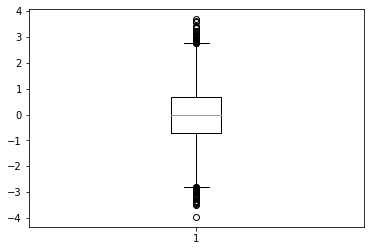

In [113]:
# To see a boxplot we just choose the column of the dataframe we are interested in and pass it
# to pyplot's boxplot function. matplotlib uses numpy arrays for data, but since pandas is built
# on top of numpy things work fluidly
plt.boxplot(df['normal'])

You'll see that matplotlib actually prints out a bunch of information about artists. Often we don't really want to see this, but it can be handy at times. To supress this we simply put a semicolon at the end of our last statement. This is a Jupyter notebook trick that I've actually used a few times and haven't told you about -- it supresses printing the last variable in a cell. Be warned, it's not standard python!

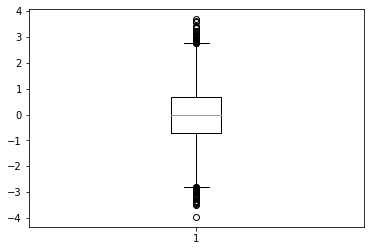

In [114]:
# Now just the image
plt.boxplot(df['normal']);

Great, this gives us a basic box plot. Now let's add the other two samples to it. Unfortunately we can't just pass a whole pandas data frame to matplotlib. Instead we need to pull out each column and send them in as a list of values. 

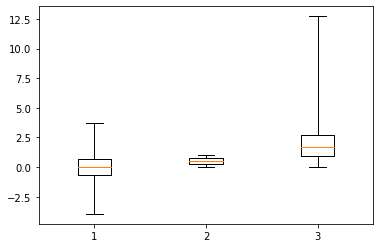

In [115]:
# plot boxplots for all three of df's columns
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis=[0,100]);

All right, that gives us our three distributions. Now, we didn't normalize the scale, so that's a little wonky. But if we look at the gamma distribution, for instance, we see the tail of it is very, very long. So the maximum values are very far out. Let's take a look at this by itself in a histogram.

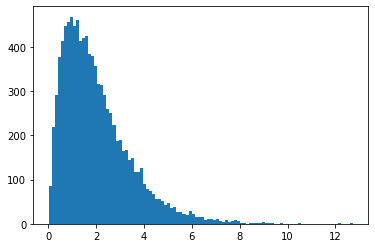

In [116]:
plt.hist(df['gamma'], bins=100);

Interesting, we see it starts at a moderate level, spikes up, then drops off much more gradually and does indeed have a very long tail. Let's add this to our box plot, and I'm going to take this as an opportunity to demonstrate something called **inset axes**.

Recall that we have one figure with one subplot. Since we didn't do anything fancy with subplots, that means we only have one axes object. We can actually overlay an axes on top of another within a figure. We do this by calling the `inset_axes` function on the figure and sending in details of the new axes that we want to create. The details we send are a position in x/y space and the width and height of the new plot.

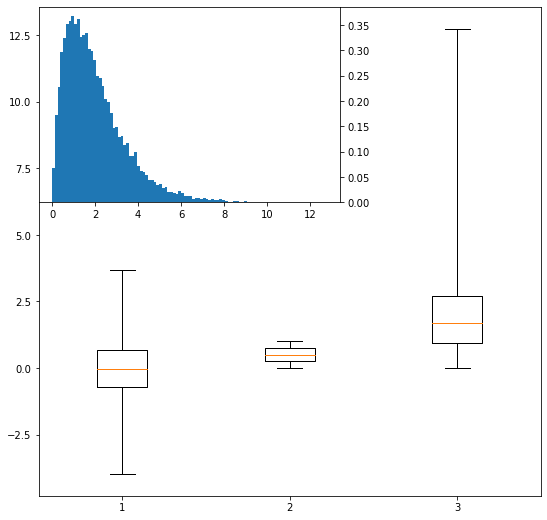

In [120]:
plt.figure(figsize=(9,9))
# Our main figure is our boxplot
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis=[0,100])
# Now let's plot on that axes a new axes object! This will be overlayed on
# top, and we provide a bounding box of (0,0.6) as the bottom left, and 
# (0.6,0.4) as width and height. These are ratios of the ax object
ax2 = plt.gca().inset_axes([0,0.6,0.6,0.4])
# Now we can just plot our histogram right on there
ax2.hist(df['gamma'], bins=100, density=True)
# And since the histogram will have tick labels on the left and clash with
# the main figure, we can flip them to the right
ax2.yaxis.tick_right();

Pretty cool, isn't it? So in one figure here we have our boxplots of three distributions, and then we have a nice little inset image showing the histogram of the far right boxplot.

Remember again that each boxplot is our five number summary -- a median line in red in the middle, then two boxes on either side of that which represent 25% of the population respectively, then whiskers which run out to the maximum and minimums of the data. This would be a great time to pause the video and play with the notebook, to clean up this figure by adding titles, legends, and the like. How would you make it clear to the reader that the inset histogram is about the boxplot on the far right, for instance?

Now, we often want to look at a boxplot not by seeing the maximum and minimum values but instead by emphasizing outliers. 
How outliers are detected really depends, and there are various mechanisms to determine whether an observation is an outlier or not. If we look at the documentation though, the default for matplotlib is that outliers are all data points which are either greater than or less than the distance between the hinge (the bottom or top of the box, or first and third quartile), and 1.5 * the inter-quartile range (IQR). The interquartile range is the distance between the two hinges, which captures 50% of our data. So if we omit the `whis` parameter to the boxplot call we'll see the outliers using this method plotted.

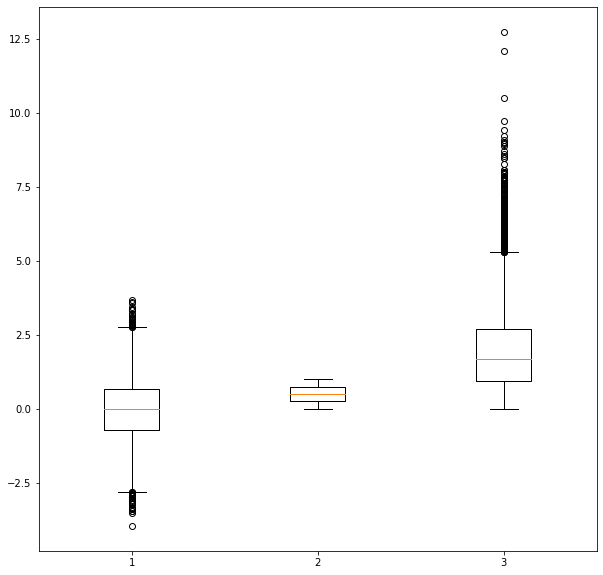

In [118]:
# Nice big figure
plt.figure(figsize=(10,10))
# Now with outliers
plt.boxplot([ df['normal'], df['random'], df['gamma'] ]);

Each circle in the boxplot is a single outlier observation. The box plot is one of the more common plots that you might use as a data scientist, and matplotlib has significant support for different kinds of box plots. Here the matplotlib documentation is key. You can find links in the course resources to the API, which describes the box plot functionality.

I've got one more plot to show you this week - a two dimensional histogram which is better known as a heat map. Then we'll look at a couple more advance features of matplotlib.

## Heatmaps

Heatmaps are a way to visualize three-dimensions of data and to take advantage of spatial proximity of those dimensions.

In making revisions to this course I was really tempted to get rid of the section on heatmaps, as I've seen enough bad heatmaps to last me a lifetime. The problem is heatmaps are really quite powerful when you have the right data. Weather data is a great example. You have two dimensions, latitude and longitude, and then we can overlay on top of this a third dimension, say, temperature or rainfall amounts and use color to indicate its intensity.

In fact, anything with a two dimensional spatial aspect can make for a natural heat map. As an example, eye fixation points through gaze detection is used regularly by researchers and marketing experts to understand what people are looking at on websites. But where heatmaps break down is when there's no continuous - or at least ordinal - relationship between dimensions. Using a heatmap for categorical data, for instance, is just plain wrong. It misleads the viewer into looking for patterns and ordering through spatial proximity. And any such patterns would be purely spurious.

But I decided to keep this in the course, because it can be useful, and I've put together a new example using ordered data, so let's talk about the techniques. In matplotlib, a heatmap is simply a two-dimensional histogram where the x and the y values indicate potential points and the color plotted is the frequency of the observation.

In [121]:
# Let's bring in matplotlib and numpy, as well as pandas and some date time functionality
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

In [138]:
# In this example I want to show you some traffic data from New York City, which is
# all available from NYC open data portal.
df=pd.read_csv("C:\\Users\\Manya\\Documents\\Resources and Datasets\\Coursera_datasets\\Course 2\\NYC hourly traffic.csv") 
# I'm going to convert the date column into a date and time
df['Date'] = df['Date'].apply(pd.to_datetime)

df.head()

,Plaza ID,Date,Hour,Direction,# Vehicles - E-ZPass,# Vehicles - VToll
0,21,2022-08-06,0,I,2820,649
1,21,2022-08-06,1,I,2124,474
2,21,2022-08-06,2,I,1617,391
3,21,2022-08-06,3,I,1228,358
4,21,2022-08-06,4,I,1604,368


In [143]:
# That might take a bit to load if you are following along on Coursera, it's a big dataset. Let's pare it down in size 
# and do some basic exploratory data analysis with histograms. Let's say I'm interested in a single plaza
# (camera location) and dates for the early part of 2017. I'm going to write a pandas query to do that  
sample=df.query("`Plaza ID`==5 & Date>'2016-12-30' & Date<'2017-05-01'")
sample
#df2= df.where(df['Plaza ID']==5 & df['Date']>'2016-12-30')
#df2.head()

,Plaza ID,Date,Hour,Direction,# Vehicles - E-ZPass,# Vehicles - VToll
735652,5,2017-04-29,0,I,216,25
735653,5,2017-04-29,0,O,100,23
735654,5,2017-04-29,1,I,111,21
735655,5,2017-04-29,1,O,53,18
735656,5,2017-04-29,2,I,72,16
...,...,...,...,...,...,...
773399,5,2016-12-31,21,O,234,54
773400,5,2016-12-31,22,I,180,46
773401,5,2016-12-31,22,O,177,40
773402,5,2016-12-31,23,I,126,30


This syntax might look a bit different to you from our first course. This is an alternative way to query a dataframe, and it uses a library called `numexpr` to take a query as a string and apply it to the dataframe. It's a bit like SQL in its syntax, if you are familiar with that, but it has a lot of caveats with it. I wanted to expose you to it so you were aware, but it's completely possible for you to use the regular boolean masking method I showed you in course 1. Now would be a great time to pause the video, open the notebook, and see if you could re-write this query using the knowledge you already have on boolean masking.

We have the hour of day here, so let's take a look at a histogram of activity over a day.

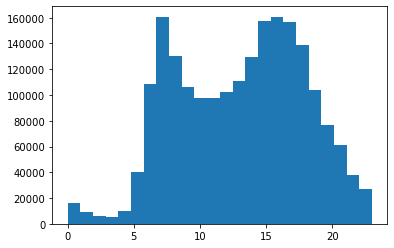

In [144]:
# since we have 24 hours in a day I'll set the bins there, and I want
# to see our frequency -- the weights for each bin -- as the number of
# vehicles which have the E-ZPass system. This system automatically bills
# drivers for using the road, and has already been aggregated (summed)
# for us from individual observations
plt.hist(sample["Hour"],bins=24,weights=sample["# Vehicles - E-ZPass"]);

Ok, what do you notice here? I see two spikes, mornings around 7:30 and afternoons starting at about 3 until 6. Sounds like rush hour!

In this example our hours are ordered, so it makes sense to view the data in this way. But we also have days of the week which are ordered. Let's extract the day of the week and look at a histogram of that.

C:\Users\Manya\AppData\Local\Temp/ipykernel_6432/2117668974.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample["Day of Week"]=sample["Date"].dt.dayofweek


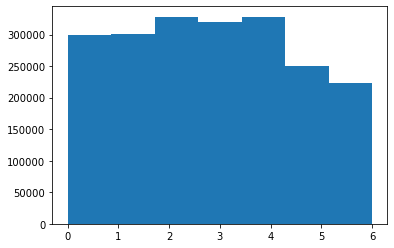

In [145]:
# We can extract the day of the week from the Date column using the
# pandas date time features. The Series object in pandas has an
# attribute "dt" which stores numerous date time transformations for
# us because it's such a common need. In this case we just take the
# Date column (which is a Series object) and get the .dt.dayofweek
# from it.
sample["Day of Week"]=sample["Date"].dt.dayofweek

# Once we have done that we can just look at a histogram
plt.hist(sample["Day of Week"],bins=7,weights=sample["# Vehicles - E-ZPass"]);

Ok, so we can see that traffic flow is pretty steady except for days 5 and 6 in the week, which happen to be the weekends. Now, we could isolate those days and look at the individual histograms for hourly traffic, but we can also look at a joint histogram -- or a heat map -- for both the hourly and daily variables. When we do this we set one variable to be the x axis, another to be the y axis, and then we render our frequency (our weights) as different colors showing the third dimension.

Text(0, 0.5, 'Day of week')

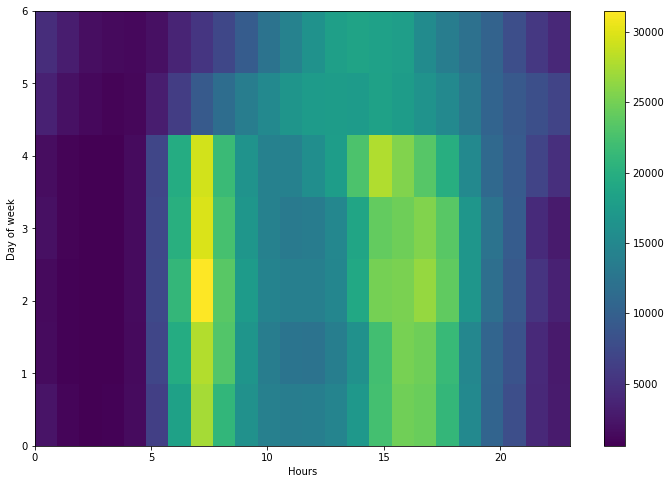

In [151]:
# While it sounds like a lot of work, it isn't really in matplotlib!
# The API looks almost the same as a regular histogram, but in this
# case we have to specify the bin size for each axis
plt.figure(figsize=(12,8)) # make a slightly bigger figure
plt.hist2d(sample["Hour"],
           sample["Day of Week"],
           bins=[24,7],
           weights=sample["# Vehicles - E-ZPass"])

# This next part is optional, but adds a legend telling you the value
# of each bin (cell) in the histogram
plt.colorbar();
plt.xlabel('Hours')
plt.ylabel('Day of week')

Great! So lets disect this. First, we see that across all days (our y axis) the first four or so hours of the day are dark blue (this is the first four columns or so), indicating relatively little traffic. Then we see that for the days 0 through 4 we get a spike in traffic, shown as more yellow intensity cells in the image, but this isn't really true for the last two days of the week (the weekend - the top two rows).

Time data is an interesting case for using heat maps, because we often have cycles of activity within a time period -- in this case weeks -- and that allows us to have two ordered dimensions.

Now would be a good time for you to grab control and see if you could look at a different dimension -- months. Could you plot a heat map where one axis is months and the other is, say, week of the month?

## Animation

So far we focused on static images, but matplotlib does have some support for animation. This requires a separate library to use in the Jupyter notebook called `ipympl`, and I've installed that for you here. Animation depends on this library because it provides a new backend for us, call the `widget` backend. Let's turn that on here.

In [159]:
%matplotlib widget

# We can bring in some other libraries we will need too, including the 
# matplotlib animation module
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

The Maplotlib.animation module contains important helpers for building animations, and for our discussion today the important object we are going to use is called `FuncAnimation`. This builds an animation by iteratively calling a function which you define. This function's job is to clear the axis object and redraw the next frame of the animation. Then these frames are all stacked together into a playable video.

I like to use this demonstration in my classes here at Michigan to show students how distributions can be sampled from. So we're going to build a basic animation which is going to pull 100 samples out of the normal distribution. Let's generate that data now.

In [160]:
n = 100
x = np.random.randn(n)

Okay, next we want to actually create a function which will do the plotting. We'll call this function `update`. Now the matplotlib FuncAnimation object is going to call this every few milliseconds and pass in the frame number we are on starting with frame zero. So we can use this as the index into our array values, which we called `x`.

The very first thing we want to do is see if the current frame is at the end of our list. If so, we need to tell the animation to stop. We do this by calling the stop object on the event source object attached to the FuncAnimation object.

In [164]:
# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    
    # What is a? Well, it's an object that we'll define in a bit, and it will
    # sit outside of this function but we can still access it since python allows
    # us to access variables in the global scope.
    
    # Now on to the work. First thing we want to do is clear the current axes.
    # We can do this with plt.cla().
    plt.cla()
    
    # Now I just want to plot a histogram. I'm going to set my bins to a predictable
    # value so it doesn't jump around, but you can play with this
    bins = np.arange(-4, 4, 0.5)
    
    # Then we just make the hist() using the current frame number which was passed
    # into the function and our global values array
    plt.hist(x[:curr], bins=bins)
    
    # Set the axes limits
    plt.axis([-4,4,0,30])
    
    # And add some nice labels throughout
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])

Now most of our hard work is done so we just have to view it. To do this, we just generate a new figure, then call the FuncAnimation constructor and we'll assign this to variable a, since we need this for our `update()` function which will stop the animation at the end. The first parameter is the figure that we're working with. This isn't so important here, since we're using the pylot scripting interface to manage the figure. Then the name of our function and then the amount of time we want between updates. Let's set this to 100 milliseconds.

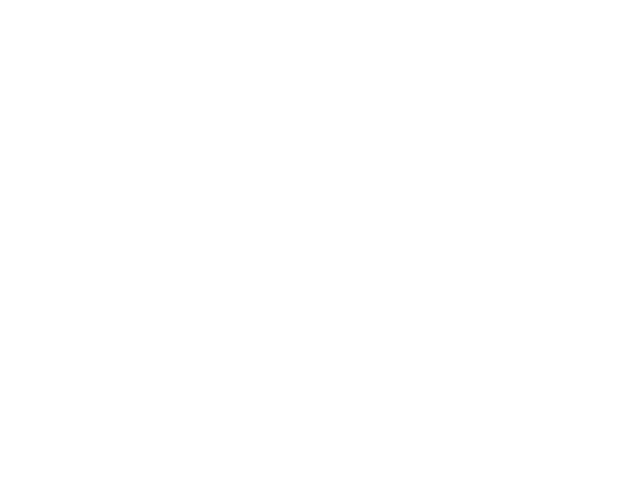

In [165]:
# Quick to start
a = animation.FuncAnimation(plt.figure(), update, interval=100)

# Now tell the widget back end it's time to show!
plt.show()

# Did not work for me. Recheck the course video 
# later https://www.coursera.org/learn/python-plotting/lecture/WoeKp/animation

## Widgets:
Will do later again. Did not understand much about these codes.

## Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

Text(15.492617875359034, 0.5, 'x4\nUniform')

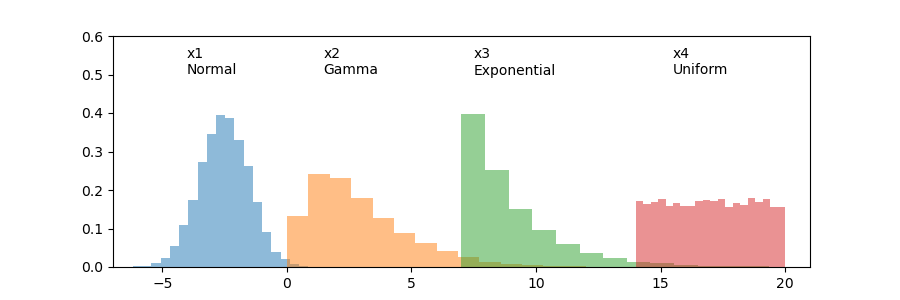

In [167]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, density=True, bins=20, alpha=0.5)
plt.hist(x2, density=True, bins=20, alpha=0.5)
plt.hist(x3, density=True, bins=20, alpha=0.5)
plt.hist(x4, density=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

# Module 4:

## Pandas visualizations

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# see the pre-defined styles provided.
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [4]:
# use the 'seaborn-colorblind' style
plt.style.use('seaborn-colorblind')

In [23]:
np.random.seed(123)

df = pd.DataFrame({'A': np.random.randn(365).cumsum(0),
                  'B': np.random.randn(365).cumsum(0) + 20,
                  'C': np.random.randn(365).cumsum(0) - 20},
                 index= pd.date_range('1/1/2017', periods= 365))
df.head()

,A,B,C
2017-01-01,-1.085631,20.059291,-20.230904
2017-01-02,-0.088285,21.803332,-16.659325
2017-01-03,0.194693,20.835588,-17.055481
2017-01-04,-1.311601,21.255156,-17.093802
2017-01-05,-1.890202,21.462083,-19.518638


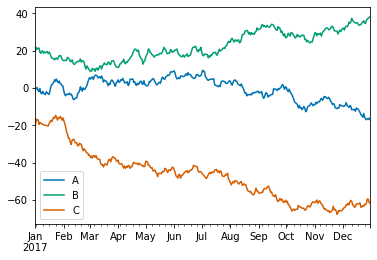

In [24]:
df.plot(); # add a semi-colon to the end of the plotting call to suppress unwanted output

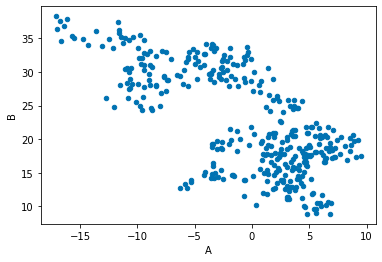

In [25]:
df.plot('A', 'B', kind = 'scatter');

You can also choose the plot kind by using the `DataFrame.plot.kind` methods instead of providing the `kind` keyword argument.

`kind` :
- `'line'` : line plot (default)
- `'bar'` : vertical bar plot
- `'barh'` : horizontal bar plot
- `'hist'` : histogram
- `'box'` : boxplot
- `'kde'` : Kernel Density Estimation plot
- `'density'` : same as 'kde'
- `'area'` : area plot
- `'pie'` : pie plot
- `'scatter'` : scatter plot
- `'hexbin'` : hexbin plot

Now let's try this and create something a little more complex. This time we want to make a scatterplot with points varying in color and size. We'll use df.plot.scatter, pass in columns A and C.

And set the color C and size S to change based on the value of column B.

Finally, we can choose the color palette used by passing a string into the parameter color map.

Here, I'll use viridis, which is particularly pleasing to the eye.

<AxesSubplot:xlabel='A', ylabel='C'>

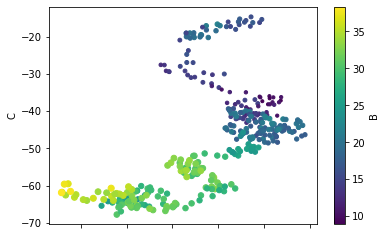

In [27]:
# create a scatter plot of columns 'A' and 'C', with changing color (c) and size (s) based on column 'B'
df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')

Here we can see the A and C columns plotted against one another with the size and color changing based on the values of the B column. Because df.plot.scatter returns a matplotlib.axes._subplot, we can perform modification on this object just like objects returned by matplotlib plots.

For example, let's see what it looks like when we change the aspect ratio of the AxesSubplot to equal.

Setting the aspect ratio to equal allows the viewer to easily see that the range of series A is much smaller than series C.

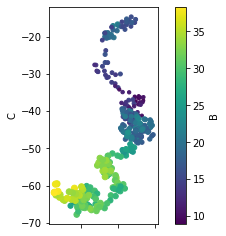

In [28]:
ax = df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')
ax.set_aspect('equal')

Using pandas, we can also easily do box plots, Histograms, And kernel density estimate plots. Which are useful for visualizing an estimate of a variable's probability density function. Kernel density estimation plots come in handy in data science application where you want to derive a smooth continuous function from a given sample.

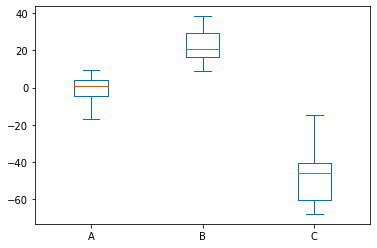

In [29]:
df.plot.box();

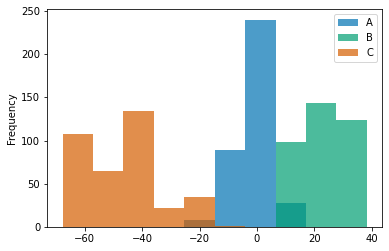

In [30]:
df.plot.hist(alpha=0.7);

[Kernel density estimation plots](https://en.wikipedia.org/wiki/Kernel_density_estimation) are useful for deriving a smooth continuous function from a given sample.

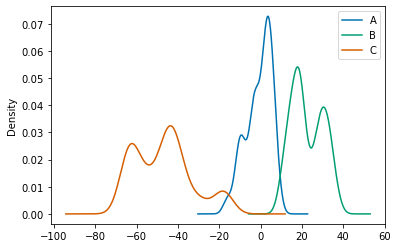

In [31]:
df.plot.kde();

## Seaborn

Seaborn, a Python visualization library based on matplotlib, is just a wraparound matplotlib. It adds styles to make default data visualizations much more visually appealing and makes creation of specific types of complicated plots much simpler.

In [33]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Now, let's set the seed for the random number generator, which lets us reproduce the data.

Next, let's make a pandas series v1 that's 1000 numbers drawn from a normal distribution with a mean of 0, and a standard deviation of 10. Let's also make a second pandas series, v2, which is 2 times v1, plus 1,000 numbers drawn from a normal distribution with a mean of 60 and standard deviation of 15.

In [35]:
np.random.seed(1234)

v1 = pd.Series(np.random.normal(0,10,1000), name='v1')
v2 = pd.Series(2*v1 + np.random.normal(60,15,1000), name='v2')

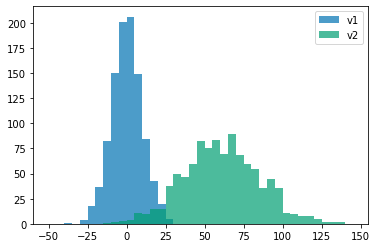

In [42]:
plt.figure()
plt.hist(v1, alpha = 0.7, bins = np.arange(-50,150,5), label='v1')
plt.hist(v2, alpha = 0.7, bins = np.arange(-50,150,5), label='v2');
plt.legend();

Looking at the histograms we can quickly see that v1 has a lower mean than v2, and that v2 has a larger spread than v1.
Even though up to this point we've only used matplotlib for plotting we see that even importing Seaborn has changed the aesthetics of the plot to a different style from the matplotlib default.
Let's visualize these histograms again but in a different way.
First, let's pass in both of the series v1 and v2 in a list. And set the histtype to barstacked.
Setting normed to True will normalize the histogram to form a probability density.
Next, let's create a variable v3, which is the combination of v1 and v2.
We'll use v3 to plot a kernel density estimate plot over the stacked histogram. The kernel density estimation plot estimates the probability density function of the variable v3. Plotting it on top of the stacked histograms of v1 and v2 allows us to see the relationship between these two visualizations.

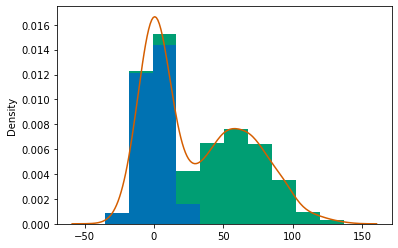

In [41]:
# plot a kernel density estimation over a stacked barchart
plt.figure()
plt.hist([v1, v2], histtype='barstacked', density=True);
v3 = np.concatenate((v1,v2))
sns.kdeplot(v3);

Seaborn provides a convenient function for these type of plots sns.distplot. Let's take a look at how it works.

We can pass in the variable we want to visualize along with keyword arguments for each of the individual components of the plot. Let's set the histogram color to teal and the KDE color to navy.

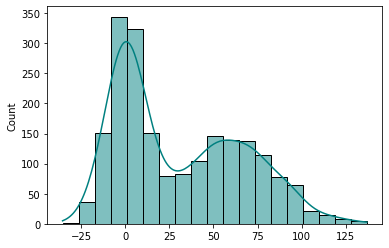

In [47]:
plt.figure()

sns.histplot(v3, color='Teal', kde=True);

Now let's look at an example of one of the types of complex plots that Seborn provides a convenient interface for, the joint plot.

The jointplot creates a scatterplot along the histograms for each individual variable on each axis.

You've actually seen jointplots in module two and created them manually yourself.

To create a jointplot, we just type sns.jointplot and pass in the two series, v1 and v2.

Setting alpha to 0.4 will help with visualizing overlapping points. The jointplot allows us to visualize the distribution of the two variables individually. As well as relationships between the variables. Using jointplot we can see that v1 and v2 appear to be normally distributed variables that are positively correlated. Because Seaborn uses matplotlib we can tweak the plots using Matplotlib's tools.

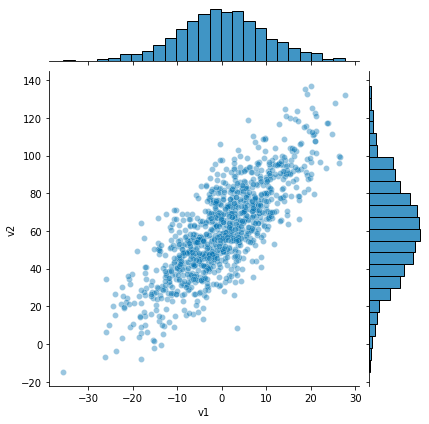

In [48]:
sns.jointplot(x=v1, y=v2, alpha=0.4);

Some of the plotting functions in Seaborn return a matplotlib axis object. While others operate on an entire figure and produce plots with several panels, returning a Seaborn grid object.

In both cases, matplotlib can be used to further tweak the plots. For example, sns.jointplot returns a Seaborn grid object.

From this we can plot a map plot axis subplot object using grid.ax_joint.

Then, we can set the aspect ratio to be equal, using set_aspect equal. Hexbin plots are the bivariate counterpart to histograms. Hexbin plots show the number of observations that fall within hexagonal bins.

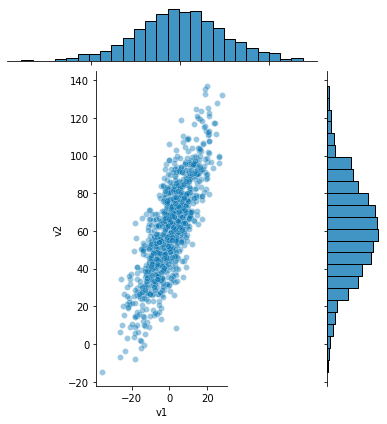

In [49]:
grid = sns.jointplot(x=v1, y=v2, alpha=0.4);
grid.ax_joint.set_aspect('equal')

Sns joint plot includes the hex bin style we can use by passing in hex to the kind parameter.

The hexbin style of plot works well with relatively large data sets. Another good option for visualizing the distribution of data sets is kernel density estimations or KDE plots. You can think of two dimensional KDE plots as the continuous version of the hexbin jointplot.

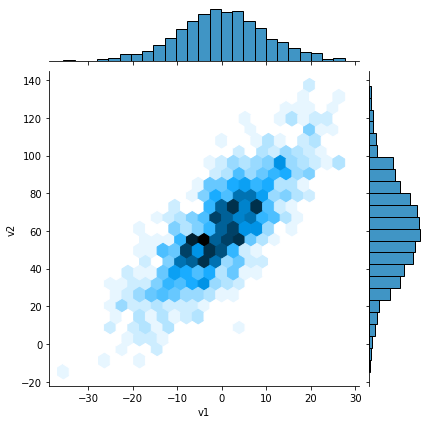

In [50]:
sns.jointplot(x=v1, y=v2, kind='hex');

First, let's tell Seaborn to use a different style using sns.set_style('white').

All of the following charts will have the gray grid turned off.

Now we'll create a joint plot just like before, except this time, let's set the kind to kde.

Finally, let's space to 0, which will plot the marginal distributions directly on the border of the scatter plot. We can see that Seaborn has some built-in options for easy customization. And provides us with easy to create and beautiful plots for exploring the distributions of your data. For the last part of this tutorial, let's load in the iris dataset, to see how Seaborn handles visualizations of categorical data

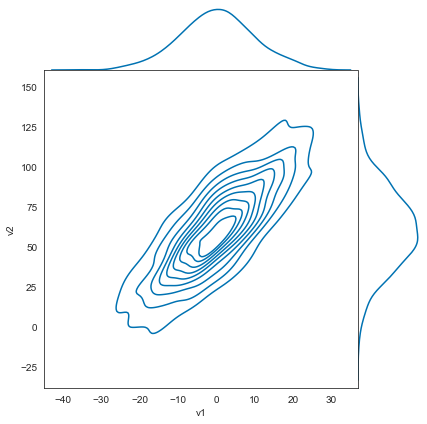

In [51]:
# set the seaborn style for all the following plots
sns.set_style('white')

sns.jointplot(x=v1, y=v2, kind='kde', space=0);

Similar to pandas, Seaborn has a built in function that creates a scatterplot matrix.

We pass in the iris data of frame.

In [53]:
iris = pd.read_csv("C:\\Users\\Manya\\Documents\\Resources and Datasets\\Coursera_datasets\\Course 2\\iris.csv")
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Tell it to map name to different colors using the hue parameter.

And tell it to use a kde along the diagonals instead of the default histograms.

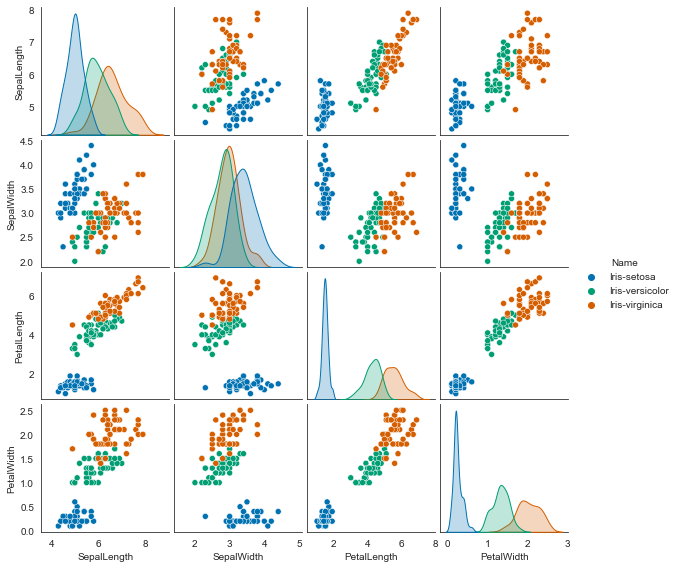

In [54]:
sns.pairplot(iris, hue='Name', diag_kind='kde', height=2);

Looking at the pair plot, it's clear there are some clusters in the data set. It looks like peddle length and peddle width are good options for separating the observations, whereas width is not a strong separator.

Using pair plot to look at your data frame can be a very useful tool in exploratory data analysis. One final plot I'd like to show you is called the violin plot.

You can think of a violin plot as a more informative version of a box plot.

To demonstrate, let's plot a violin plot next to a swarm plot, which you can think of as a scatter plot for categorical data.
First let's create a new figure and a subplot.
Next, we'll create the swarmplot, passing in Name and PetalLength, and the data, which is the iris data frame.
For the next subplot, we'll create the violinplot, again passing in Name, PetalLength and the iris data frame.

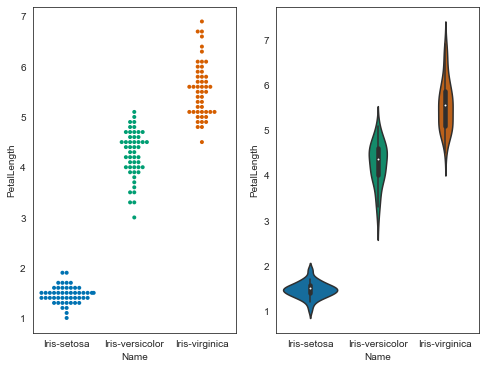

In [55]:
plt.figure(figsize=(8,6))
plt.subplot(121)
sns.swarmplot(x='Name', y='PetalLength', data=iris, size=4);
plt.subplot(122)
sns.violinplot(x='Name', y='PetalLength', data=iris);

Looking at the swarmplot, each species has its own column and each observation's petal length is shown. With more common values appearing as the wide parts of the cluster, much like a histogram.

The violinplot is like box plot with a rotated kernel density estimation on each side.

Violin plots convey more information than box plots and are able to show particular phenomena within the distribution that box plots are unable to convey such as multi modality. Seaborn is a library that not only adds new styles and visual aspects. But also introduces new functionality such as joint plots, scatter matrix plots, and violin plots.

Seaborn is being actively developed, and is easy to install, which makes it an indispensible part of a data scientist's toolkit. But keep in mind, this is functionality built on top of matplotlib, and these are largely matplotlib artists being used. So, if you have any ideas for a new statistical visualization, or you've read about one in a publication or journal. You should have the ability to create your own visualization toolkits.

That's it for Seaborn tutorial, thanks for watching, happy plotting.

# Module 3:- Assignment 2:

## Step 1

Load the dataset and transform the data into Celcius (refer to documentation) then extract all of the rows which have minimum or maximum temperatures.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv("C:\\Users\\Manya\\Documents\\Resources and Datasets\\Coursera_datasets\\Course 2\\Mod3_Assignment3.csv") 
# df.head()
# df.describe()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [3]:
# In this code cell, transform the Data_Value column according to the dataset explanation, 
# Data_Value is in tenths of degrees C
df['Data_Value'] = df['Data_Value']*0.1
# df['Data_Value'] = df['Data_Value'].apply(lambda x: float('{:.2f}'.format(x)))
df['Date'] = pd.to_datetime(df['Date'])
# df.describe()

df['month_day']= df['Date'].dt.strftime('%m-%d')
df['year']= df['Date'].dt.strftime('%Y')

# df.head()

## Step 2
In order to visualize the data we would plot the min and max data for each day of the year between the years 2005 and 2014 across all weather stations. But we also need to find out when the min or max temperature in 2015 falls below the min or rises above the max for the previous decade.

If you did step 1 you have two Series objects with min and max times for the years 2005 through 2015. You can use Pandas `groupby` to create max and min temperature Series objects across all weather stations for each day of these years, and you can deal with the records for February 29 (the leap year) by dropping them.

__hint: when I finished this step, I had two DataFrame objects, each with exactly 4015 observations in them__

In [4]:
# Dropping the records for February 29 (Leap Year)
df = df[~((df['Date'].dt.month == 2) & (df['Date'].dt.day == 29))]

# create a DataFrame of maximum temperature by date
df_max = df.groupby(by=['Date'])['Data_Value'].max().reset_index()
# print(df_max)
# create a DataFrame of minimum temperatures by date
df_min = df.groupby(by=['Date'])['Data_Value'].min().reset_index()
# print(df_min)

# new_df = pd.concat([df_max, df_min], ignore_index= True)   # could also use pd.concat() funtion
new_df = df_max.append(df_min)
new_df.sort_values(by='Date', ascending= True, ignore_index= True)
# print(new_df)

,Date,Data_Value
0,2005-01-01,15.6
1,2005-01-01,-5.6
2,2005-01-02,13.9
3,2005-01-02,-5.6
4,2005-01-03,13.3
...,...,...
8025,2015-12-29,10.0
8026,2015-12-30,-2.2
8027,2015-12-30,6.7
8028,2015-12-31,1.7


In [5]:
# Redoing the above group bys in another way
# Dropping the records for February 29 (Leap Year)
df = df[~((df['Date'].dt.month == 2) & (df['Date'].dt.day == 29))]

# Create dataframes for the year 2015 and 2005-2014
df_2015 = df.where(df['Date'].dt.year == 2015).dropna()
df_2005_2014 = df.where(df['Date'].dt.year != 2015).dropna()

# create a DataFrame of maximum temperature by date
df_max_2015 = df_2015.groupby(by=['Element', 'month_day'])['Data_Value'].max().reset_index()
df_max_2005_2014 = df_2005_2014.groupby(by=['Element', 'month_day'])['Data_Value'].max().reset_index()
# print(df_max_2015)
# print(df_max_2005_2014)

# create a DataFrame of minimum temperatures by date
df_min_2015 = df_2015.groupby(by=['Element', 'month_day'])['Data_Value'].min().reset_index()
df_min_2005_2014 = df_2005_2014.groupby(by=['Element', 'month_day'])['Data_Value'].min().reset_index()
# print(df_min_2015)
# print(df_min_2005_2014) 

## Step 3
Now that you have grouped the daily max and min temperatures for each day of the years 2005 through 2015, you can separate out the data for 2015. Then you can use the Pandas `groupby` function to find the max and min of the temperature data for each __day of the year__ for the 2005-2014 data. (Explanation - Next is take 2015 and for every day where the temp is larger/smaller then the same day in the 10 years plot the point.)

__hint: at the end of this step I had two DataFrames, one of maximum and the other of minimum values, which each had 365 observations in them. I also had another pair of similar DataFrames but only for the year 2015.__

In [6]:
# calculate the minimum and maximum values for the years 2015
record_max_2015 = df_max_2015.where(df_max_2015['Element']=='TMAX').dropna()
record_min_2015 = df_min_2015.where(df_min_2015['Element']=='TMIN').dropna()
# print(record_max_2015)
# print(record_min_2015)

# calculate the minimum and maximum values for the day of the year for 2005 through 2014
record_max_2005_2014 = df_max_2005_2014.where(df_max_2005_2014['Element']=='TMAX').dropna()
record_min_2005_2014 = df_min_2005_2014.where(df_min_2005_2014['Element']=='TMIN').dropna()
# print(record_max_2005_2014)
# print(record_min_2005_2014)

## Step 4
Now it's time to plot! You need to explore matplotlib in order to plot line graphs of the min and max temperatures for the years 2005 through 2014 and to scatter plot __only__ the daily 2015 temperatures that exceeded those values.

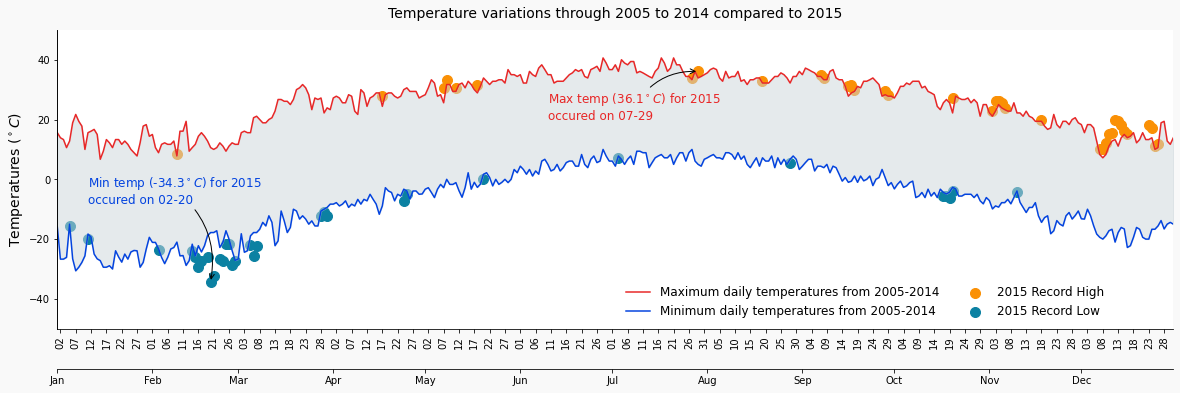

In [19]:
# Redoing the plot again with changed dataframes
fig, ax = plt.subplots(figsize= (20,5.5), facecolor = '#F9F9F9')

# plot the maximum temperatures each day for the years through 2005 through 2014
# plt.plot(record_max_2005_2014['month_day'], record_max_2005_2014['Data_Value'], color= '#e82727')  
ax.plot(record_max_2005_2014['month_day'], record_max_2005_2014['Data_Value'], color= '#e82727') #we can also do axis plot
# plot the minimum temperatures each day for the years through 2005 through 2014
plt.plot(record_min_2005_2014['month_day'], record_min_2005_2014['Data_Value'], color= '#0343DF')

# plot scatter plot for temperatures in 2015
temp_max_2015 = record_max_2015[record_max_2015['Data_Value'] > record_max_2005_2014['Data_Value']]
temp_min_2015 = record_min_2015[record_min_2015['Data_Value'] < record_min_2005_2014['Data_Value']]
ax.scatter(temp_max_2015['month_day'], temp_max_2015['Data_Value'], color = '#fa9005', s=100)
ax.scatter(temp_min_2015['month_day'], temp_min_2015['Data_Value'], color = '#0b81a2', s=100)

# set limits for x and y axis of the plot
ax.set_xlim(df['month_day'].min(), df['month_day'].max())
ax.set_ylim(-50, 50)

# breakdown the x-axis to month and days xticks values, format the x tick labels
# set 1st x-axis (DAYS) with interval in 40 days to make xticks values visible
ax.xaxis.set_major_locator(mdates.DayLocator(interval= 5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y')) # plots month-year format in x-axis, did not use here
plt.xticks(rotation = 90)

# create a twin Axes sharing the yaxis
ax1 = ax.twiny()

# Set 3rd x-axis for MONTH
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval= 1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax1.xaxis.set_ticks_position('bottom')
ax1.xaxis.set_label_position('bottom')
ax1.spines['bottom'].set_position(('outward', 40))
ax1.set_xlim(ax.get_xlim()) 

# add labels and title
ax.set_ylabel('Temperatures ($^\circ C $)',
              {'fontsize': 14, 'color': '#000000'})
ax.set_title("Temperature variations through 2005 to 2014 compared to 2015",
              {'fontsize': 14, 'color': '#000000'}, y=1.02)
ax.legend(['Maximum daily temperatures from 2005-2014','Minimum daily temperatures from 2005-2014', 
           '2015 Record High', '2015 Record Low'], loc= 'best', bbox_to_anchor = (0.5,0, 0.5, 0.5),
              ncol=2, fontsize= 12, labelcolor= '#000000', edgecolor = 'white')  
ax.fill_between(record_max_2005_2014['month_day'], record_max_2005_2014['Data_Value'], record_min_2005_2014['Data_Value'],
                 color='#CCD6DB',alpha= 0.5)

# to annotate the max and minimum temperatures for 2015 we can use the following code, first find the max and min 
# temperature values and when it occured
max_date_2015 = df_max_2015[df_max_2015['Data_Value']== df_max_2015['Data_Value'].max()]['month_day'].values[0]
max_temp_2015 = df_max_2015['Data_Value'].max()
h_val = str(max_temp_2015)
min_date_2015 = df_min_2015[df_min_2015['Data_Value']== df_min_2015['Data_Value'].min()]['month_day'].values[0]
min_temp_2015 = df_min_2015['Data_Value'].min()
l_val = str(round(min_temp_2015,2))

# annotate highest temperature value in 2015
ax.annotate('Max temp (' + h_val + '$^\circ C $) for 2015 \noccured on '+max_date_2015, (max_date_2015, max_temp_2015), 
            xytext=(160, 20), size = 12, color='#e82727', arrowprops = dict(arrowstyle="->", connectionstyle="arc3, rad = -0.3"))

# annotate lowest temperature value in 2015
ax.annotate('Min temp (' + l_val + '$^\circ C $) for 2015 \noccured on '+min_date_2015, (min_date_2015, min_temp_2015), 
            xytext=(10, -8), size = 12, color='#0343DF', arrowprops = dict(arrowstyle="->", connectionstyle="arc3, rad = -0.3"))

# we can hide some of the spines (must be done with Matplotlib)
# ax.spines[['top', 'right']].set_visible(False) # this should hide the top and right spines but not working for me ??? tbc.
# ax.spines[['top']].set_color('none') # this did not work as well
for ax in fig.canvas.figure.get_axes():
    # Disable spines.
    ax.spines[['right', 'top']].set_color('none')

plt.show()